<a href="https://colab.research.google.com/github/mauloredo/Challenge_Telecom_X2/blob/main/x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODUCCIÓN

## CONTROL DE VERSIONES DEL DATAFRAME

```
datos_x2.csv  Dataframe importado del projecto anterior

datos.csv Dataframe con columnas object a category, como estaban originalmente

datos_v1.csv Dataframe sin las columnas TotalCharges, Cuentas_Diarias y PhoneServices

datos_v2.csv Se transforma nuevamente de object a categories

data.csv Datframe despues de One-Hot Encoding y LabelEncoder

data_2.csv Dataframe después de StandardScaler

model_x.csv Dataframe sin variables redundantes
```

## CONTROL DE OBJETOS



    hist_tenure_churn.png
    hist_monthlycharges_churn.png
    hist_totalcharges_churn.png
    boxplot_tenure_churn.png
    boxplot_monthlycharges_churn.png
    boxplot_totalcharges_churn.png
    catplot_gender_churn.png
    catplot_seniorcitizen_churn.png
    catplot_partner_churn.png
    catplot_dependents_churn.png
    catplot_contract_churn.png
    catplot_paymentmethod_churn.png
    catplot_internetservice_churn.png
    catplot_phoneservice_churn.png
    catplot_multiplelines_churn.png
    catplot_onlinesecurity_churn.png
    catplot_onlinebackup_churn.png
    catplot_deviceprotection_churn.png
    catplot_techsupport_churn.png
    catplot_streamingtv_churn.png
    catplot_streamingmovies_churn.png
    catplot_paperlessbilling_churn.png
    heatmap_correlation_X.png
    hist_tenure_churn_cleaned.png
    hist_monthlycharges_churn_cleaned.png
    catplot_InternetService_Fiber optic_churn_cleaned.png
    catplot_PaymentMethod_Electronic check_churn_cleaned.png
    catplot_Contract_Two year_churn_cleaned.png
    catplot_SeniorCitizen_churn_cleaned.png
    catplot_OnlineSecurity_Yes_churn_cleaned.png
    catplot_TechSupport_Yes_churn_cleaned.png
    cv_results_comparison.png
    roc_curve_final_model.png
    precision_recall_curve.png
    feature_importance.png


## DESCRIPCIÓN DEL DESAFÍO

**TELECOM X PARTE 2: PREDICCIÓN DE CANCELACIÓN**


¡Felicidades! Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

**Misión**
Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios. La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

**Objetivos del Desafío**
- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

**Lo que vas a practicar**

✅ Preprocesamiento de datos para Machine Learning

✅ Construcción y evaluación de modelos predictivos

✅ Interpretación de resultados y entrega de insights

✅ Comunicación técnica con enfoque estratégico

Ahora eres: Analista Junior de Machine Learning

Telecom X confía en tu entrega para dar los próximos pasos hacia una solución de inteligencia predictiva eficaz. ¡Buena suerte!


## CARGA Y EXPLORACIÓN INICIAL DE DATOS

### Importar el dataset desde el repositorio.

In [1]:
import requests
from io import BytesIO
import pandas as pd

raw_url = 'https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X2/refs/heads/main/data_x2.csv'

print(f"Attempting to download data from: {raw_url}")

try:
    response = requests.get(raw_url)
    response.raise_for_status()

    datos_x2 = pd.read_csv(BytesIO(response.content))

    print("File downloaded and loaded successfully!")
    print("DataFrame shape:", datos_x2.shape)
    print("\nDataFrame head:")
    print(datos_x2.head())

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
    print("Please ensure the raw URL is correct and the file exists in the repository.")

Attempting to download data from: https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X2/refs/heads/main/data_x2.csv
File downloaded and loaded successfully!
DataFrame shape: (7043, 21)

DataFrame head:
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  False  Female          False     Yes        Yes       9          Yes   
1  False    Male          False      No         No       9          Yes   
2   True    Male          False      No         No       4          Yes   
3   True    Male           True     Yes         No      13          Yes   
4   True  Female           True     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  

### Verificar dimensiones, tipos de datos y valores nulos.


In [2]:
# Verificar dimensiones del DataFrame
print(f"Filas: {datos_x2.shape[0]} | Columnas: {datos_x2.shape[1]}")

# Mostrar nombres de columnas
print("\n📋 Lista de columnas:")
print(datos_x2.columns.tolist())

# Tipos de datos por columna
print("\n🔧 Tipos de datos:")
print(datos_x2.dtypes)

# Recuento de valores nulos por columna
print("\n🧯 Valores nulos por columna:")
print(datos_x2.isnull().sum())

# Verificar valores únicos por columna (ideal para detectar categóricas)
print("\n🔎 Valores únicos por columna:")
print(datos_x2.nunique())

# Estadísticas descriptivas de columnas numéricas
print("\n📊 Estadísticas numéricas:")
print(datos_x2.describe())

# Estadísticas para columnas categóricas (si existen)
print("\n📊 Estadísticas categóricas:")
print(datos_x2.describe(include='object'))



Filas: 7043 | Columnas: 21

📋 Lista de columnas:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Cuentas_diarias']

🔧 Tipos de datos:
Churn                  bool
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Cuentas_diarias     float64
dtype: object



Después del análisis exploratiorio se encuentra que los tipos de variables del dataframe difieren con el archivo original,


```
Data columns (total 20 columns):
 ind   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 non-null   category
 17  PaymentMethod     7043 non-null   category
 18  MonthlyCharges    7043 non-null   float64
 19  TotalCharges      7043 non-null   object  

Churn                  bool
gender               object
SeniorCitizen          bool
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Cuentas_diarias     float64
```


Por el momento, las columnas se quedarán así ya qeu mas adelante, si decidimos incluirlas para el análisis, se convertirán con alguno de los métodos One-Hot o Label Encoder. Sin embargo se revisan los datos de estas columnas a continuación.

In [3]:
# Obtener columnas categóricas
cat_cols = datos_x2.select_dtypes(include='object').columns

# Obtener número total de filas
total_filas = datos_x2.shape[0]

for col in cat_cols:
    print(f"\n Columna: {col}")

    # Mostrar valores únicos
    uniques = datos_x2[col].unique()
    print("Valores únicos:", uniques)
    print("Cantidad de únicos:", datos_x2[col].nunique())

    # Mostrar frecuencia de cada valor
    value_counts = datos_x2[col].value_counts(dropna=False)
    print("\n Frecuencia de cada valor:")
    print(value_counts)

    # Sumar total de frecuencias
    suma_total = value_counts.sum()
    print(f"\n Suma total de valores: {suma_total}")

    # Validar coincidencia con número de filas
    if suma_total == total_filas:
        print(" La suma de frecuencias coincide con el total de filas.")
    else:
        print(" La suma NO coincide con el total de filas. Revisar posibles errores o valores perdidos.")





 Columna: gender
Valores únicos: ['Female' 'Male']
Cantidad de únicos: 2

 Frecuencia de cada valor:
gender
Male      3555
Female    3488
Name: count, dtype: int64

 Suma total de valores: 7043
 La suma de frecuencias coincide con el total de filas.

 Columna: Partner
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

 Frecuencia de cada valor:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

 Suma total de valores: 7043
 La suma de frecuencias coincide con el total de filas.

 Columna: Dependents
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

 Frecuencia de cada valor:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 Suma total de valores: 7043
 La suma de frecuencias coincide con el total de filas.

 Columna: PhoneService
Valores únicos: ['Yes' 'No']
Cantidad de únicos: 2

 Frecuencia de cada valor:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 Suma total de valores: 7043
 La suma de frecuencias coincide con el total de filas.

 Colum

In [4]:
print(type(datos_x2))

<class 'pandas.core.frame.DataFrame'>


In [5]:
print("Shape:", datos_x2.shape)
print("¿Está vacío?:", datos_x2.empty)

Shape: (7043, 21)
¿Está vacío?: False


In [6]:
# Transformación de tipos y renombrado del DataFrame

# 1. Convertir columnas object a category en datos_x2
object_columns = datos_x2.select_dtypes(include=['object']).columns
for col in object_columns:
    datos_x2[col] = datos_x2[col].astype('category')

# 2. Renombrar el DataFrame a 'datos'
datos = datos_x2.copy()

# Verificación
print("\nTipos de datos después de la conversión:")
print(datos.dtypes)
print("\nNombre del DataFrame:", [name for name in globals() if globals()[name] is datos])

# 3. Guardar el DataFrame procesado
output_filename = 'datos.csv'
datos.to_csv(output_filename, index=False)
print(f"\nDataFrame guardado como '{output_filename}'")




Tipos de datos después de la conversión:
Churn                   bool
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Cuentas_diarias      float64
dtype: object

Nombre del DataFrame: ['datos']

DataFrame guardado como 'datos.csv'


###  Estadísticas descriptivas

In [7]:
# Estadísticas descriptivas para variables numéricas
print(datos[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_diarias']].describe())

# Estadísticas para variables categóricas
print("\nDistribución de categorías:")
for col in datos.select_dtypes(include=['category', 'bool']).columns:
    print(f"\n{col}:")
    print(datos[col].value_counts(normalize=True))


            tenure  MonthlyCharges  TotalCharges  Cuentas_diarias
count  7043.000000     7043.000000   7043.000000      7043.000000
mean     32.371149       64.761692   2279.734304         2.158723
std      24.559481       30.090047   2266.794470         1.003002
min       0.000000       18.250000      0.000000         0.608333
25%       9.000000       35.500000    398.550000         1.183333
50%      29.000000       70.350000   1394.550000         2.345000
75%      55.000000       89.850000   3786.600000         2.995000
max      72.000000      118.750000   8684.800000         3.958333

Distribución de categorías:

Churn:
Churn
False    0.73463
True     0.26537
Name: proportion, dtype: float64

gender:
gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

SeniorCitizen:
SeniorCitizen
False    0.837853
True     0.162147
Name: proportion, dtype: float64

Partner:
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

Dependents:
Dependents
No 

## FASE 0: Análisis Exploratorio Básico (Antes de la Limpieza)

Realizar un análisis exploratorio para entender las distribuciones, detectar outliers, y obtener estadísticas descriptivas de los datos.

**Estadísticas descriptivas iniciales:**

Obtener resumen de las estadísticas básicas (mean, std, min, max, etc.) para todas las variables numéricas, con especial atención a las variables como MonthlyCharges, TotalCharges, tenure, etc.

Distribuciones de las variables numéricas
Graficar distribuciones de las variables numéricas:

    - tenure

    - MonthlyCharges

    - TotalCharges

**Buscar outliers y patrones inusuales:**

Boxplots para detectar outliers:
Crear boxplots para identificar valores atípicos en las variables numéricas.

**Distribuciones de variables categóricas:**
Graficar la distribución de las variables categóricas:

    - gender, SeniorCitizen, Partner, Dependents, etc.
    - Contar los valores únicos y sus frecuencias.

**Correlación de variables numéricas:**
Generar un mapa de calor de correlación para observar qué variables numéricas están más correlacionadas entre sí.

In [8]:
# Estadísticas descriptivas de las variables numéricas
print(datos.describe())


            tenure  MonthlyCharges  TotalCharges  Cuentas_diarias
count  7043.000000     7043.000000   7043.000000      7043.000000
mean     32.371149       64.761692   2279.734304         2.158723
std      24.559481       30.090047   2266.794470         1.003002
min       0.000000       18.250000      0.000000         0.608333
25%       9.000000       35.500000    398.550000         1.183333
50%      29.000000       70.350000   1394.550000         2.345000
75%      55.000000       89.850000   3786.600000         2.995000
max      72.000000      118.750000   8684.800000         3.958333


### Variables Numéricas

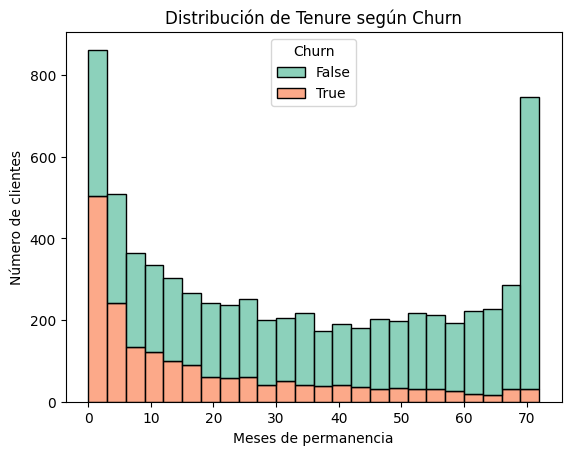

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame
datos = pd.read_csv('datos.csv')

sns.histplot(data=datos, x='tenure', hue='Churn', multiple='stack', bins=24, palette='Set2')
plt.title("Distribución de Tenure según Churn")
plt.xlabel("Meses de permanencia")
plt.ylabel("Número de clientes")
plt.savefig("hist_tenure_churn.png")
plt.show()


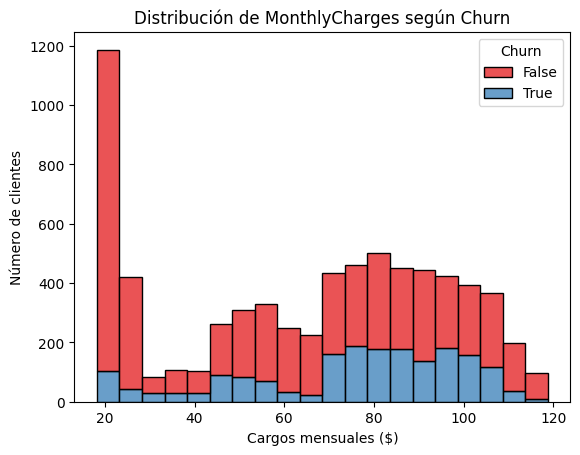

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=datos, x='MonthlyCharges', hue='Churn', multiple='stack', bins=20, palette='Set1')
plt.title("Distribución de MonthlyCharges según Churn")
plt.xlabel("Cargos mensuales ($)")
plt.ylabel("Número de clientes")
plt.savefig("hist_monthlycharges_churn.png")
plt.show()


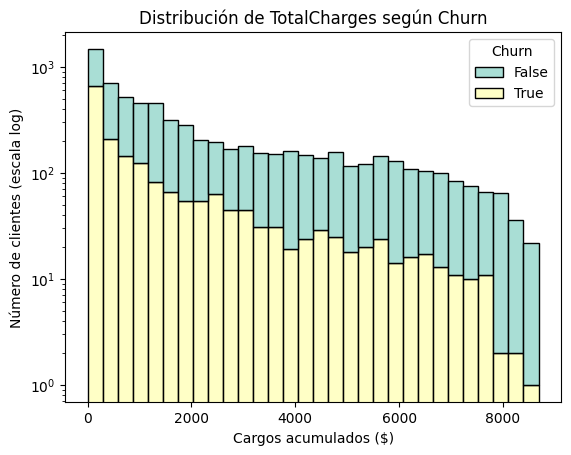

In [11]:
sns.histplot(data=datos, x='TotalCharges', hue='Churn', multiple='stack', bins=30, palette='Set3')
plt.yscale('log')  # Optional: use log scale to see low-frequency zones
plt.title("Distribución de TotalCharges según Churn")
plt.xlabel("Cargos acumulados ($)")
plt.ylabel("Número de clientes (escala log)")
plt.savefig("hist_totalcharges_churn.png")
plt.show()


Boxplot Tenure vs Churn

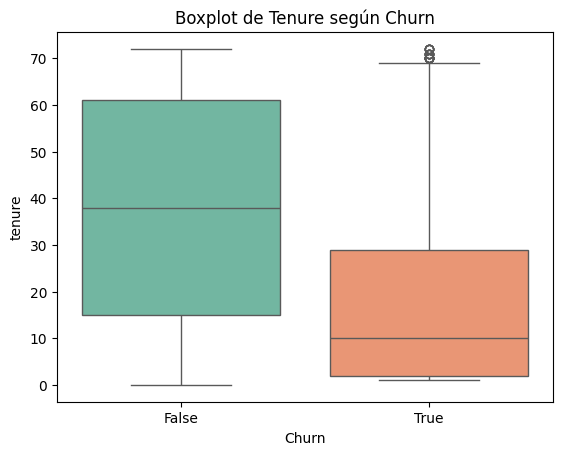

In [12]:
sns.boxplot(data=datos, x='Churn', y='tenure', hue='Churn', palette='Set2', legend=False)
plt.title("Boxplot de Tenure según Churn")
plt.savefig("boxplot_tenure_churn.png")
plt.show()


Boxplot MonthlyCharges vs Churn

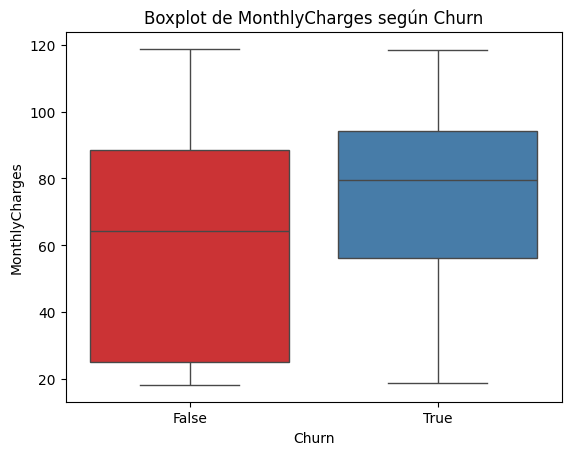

In [13]:
sns.boxplot(data=datos, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set1', legend=False)
plt.title("Boxplot de MonthlyCharges según Churn")
plt.savefig("boxplot_monthlycharges_churn.png")
plt.show()


Boxplot TotalCharges vs Churn

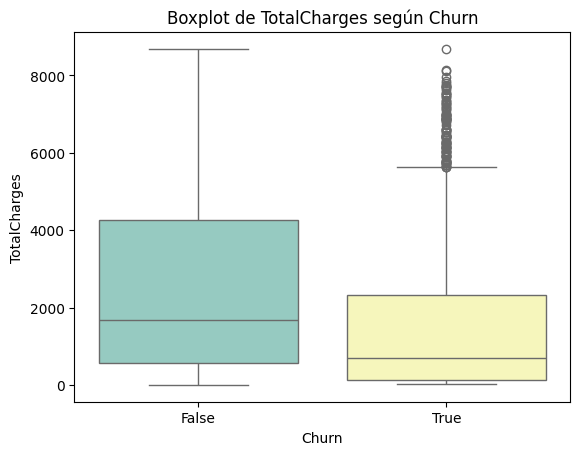

In [14]:
sns.boxplot(data=datos, x='Churn', y='TotalCharges', hue='Churn', palette='Set3', legend=False)
plt.title("Boxplot de TotalCharges según Churn")
plt.savefig("boxplot_totalcharges_churn.png")
plt.show()


Recap Variables Numéricas:

    - tenure mostró una alta concentración de clientes con pocos meses de servicio.

    - Insight: Muchos clientes que cancelan lo hacen temprano.

    - MonthlyCharges presentó una posible relación entre precios altos y mayor churn.

    - Clientes con cargos altos tienden a cancelar más.

    - TotalCharges estuvo altamente sesgado hacia valores bajos.

    - Clientes con poca inversión total tienden a cancelar más.

    - Boxplot Tenure vs Churn: Clientes que cancelan tienen menor permanencia.

    - MonthlyCharges vs Churn: Distribución más amplia en clientes que cancelan.

    - TotalCharges vs Churn: Clientes con mayor gasto tienden a quedarse.

Insights generales hasta ahora:

    La permanencia (tenure) parece ser uno de los factores más fuertes relacionados con la cancelación.

    Clientes con cargos mensuales altos muestran mayor propensión al churn.

    TotalCharges también refleja esto: clientes con historial de gasto bajo son más propensos a cancelar.

    El comportamiento observado respalda la idea de que churn ocurre temprano en el ciclo del cliente, y es más común en segmentos de alto costo y bajo valor acumulado.




### Variables Categóricas

Como punto de partida se evalúan las siguients categorías
   
    - gender

    - SeniorCitizen

    - Partner

    - Dependents

    - Contract

    - PaymentMethod

    - InternetService

Distribución de gender según churn

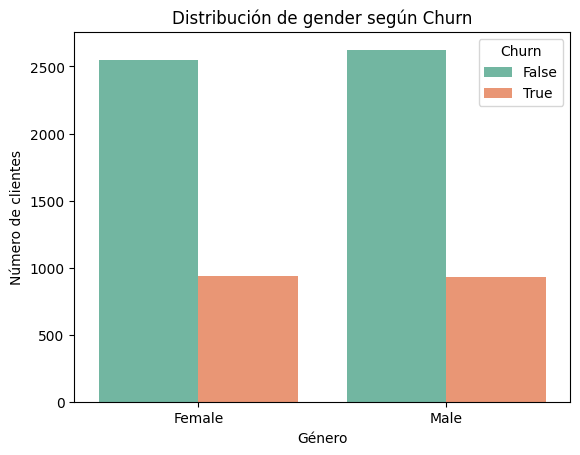

In [15]:
sns.countplot(data=datos, x='gender', hue='Churn', palette='Set2')
plt.title("Distribución de gender según Churn")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.savefig("catplot_gender_churn.png")
plt.show()


Distribución de SeniorCitizen según Churn

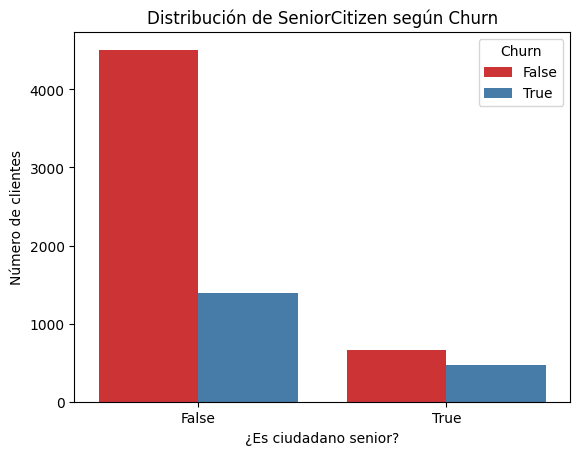

In [16]:
sns.countplot(data=datos, x='SeniorCitizen', hue='Churn', palette='Set1')
plt.title("Distribución de SeniorCitizen según Churn")
plt.xlabel("¿Es ciudadano senior?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_seniorcitizen_churn.png")
plt.show()


Distribución de Partner según Churn

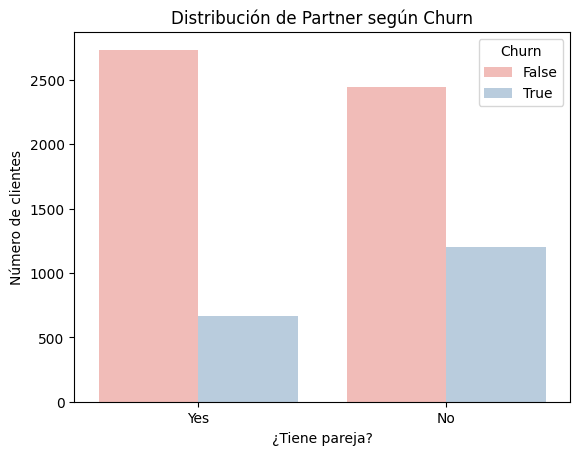

In [17]:
sns.countplot(data=datos, x='Partner', hue='Churn', palette='Pastel1')
plt.title("Distribución de Partner según Churn")
plt.xlabel("¿Tiene pareja?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_partner_churn.png")
plt.show()


Distribución de Dependents según Churn

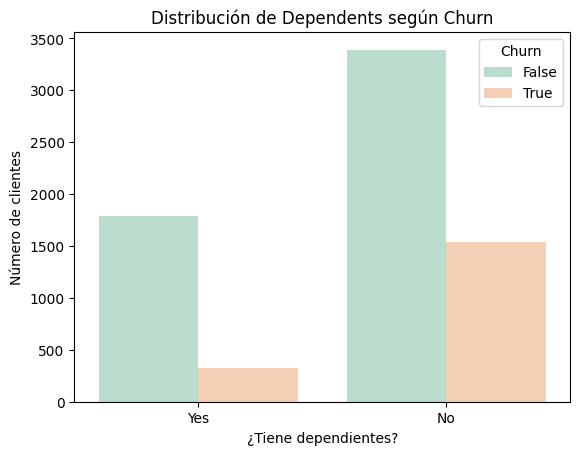

In [18]:
sns.countplot(data=datos, x='Dependents', hue='Churn', palette='Pastel2')
plt.title("Distribución de Dependents según Churn")
plt.xlabel("¿Tiene dependientes?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_dependents_churn.png")
plt.show()


Distribución de Contract según Churn

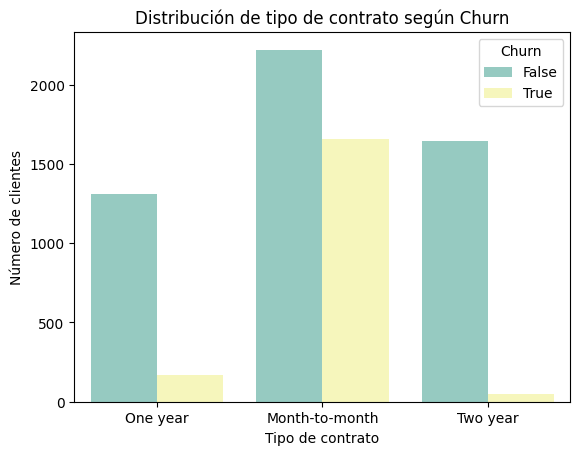

In [19]:
sns.countplot(data=datos, x='Contract', hue='Churn', palette='Set3')
plt.title("Distribución de tipo de contrato según Churn")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.savefig("catplot_contract_churn.png")
plt.show()


Distribución de PaymentMethod según Churn

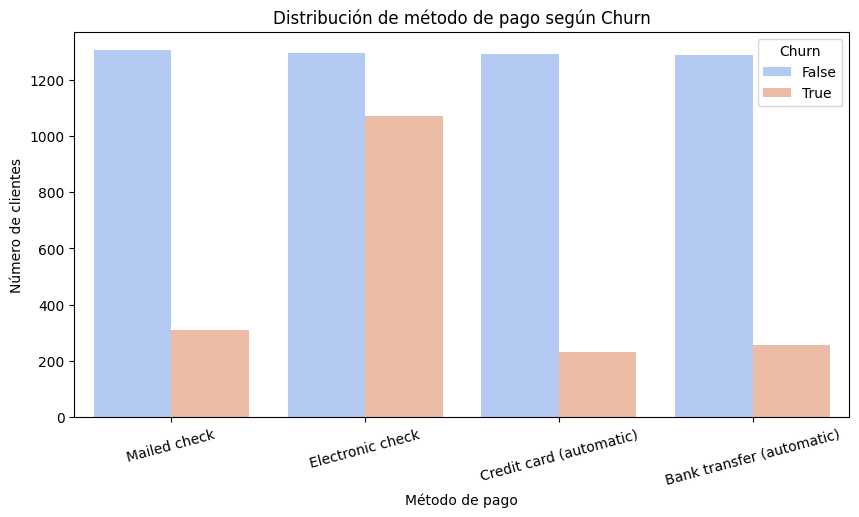

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=datos, x='PaymentMethod', hue='Churn', palette='coolwarm')
plt.title("Distribución de método de pago según Churn")
plt.xlabel("Método de pago")
plt.ylabel("Número de clientes")
plt.xticks(rotation=15)
plt.savefig("catplot_paymentmethod_churn.png")
plt.show()


Distribución de InternetService según Churn

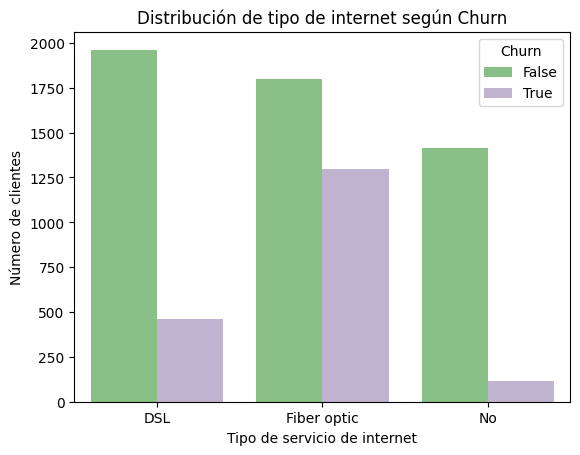

In [21]:
sns.countplot(data=datos, x='InternetService', hue='Churn', palette='Accent')
plt.title("Distribución de tipo de internet según Churn")
plt.xlabel("Tipo de servicio de internet")
plt.ylabel("Número de clientes")
plt.savefig("catplot_internetservice_churn.png")
plt.show()


 **Variables Categóricas de Perfil Demográfico y Contratación**

Estas variables están asociadas al perfil del cliente y forma de contratación:

```
- gender:	No hay diferencias relevantes de churn entre hombres y mujeres.

- SeniorCitizen:	Los adultos mayores (SeniorCitizen=1) tienen tasas de cancelación más altas.

- Partner:	Tener pareja está ligeramente asociado a menor churn, posiblemente por estabilidad.

- Dependents:	Tener dependientes se relaciona con menor probabilidad de cancelar.

- Contract:	Los contratos mensuales tienen mayor churn, mientras que contratos a 1 o 2 años retienen más.

- PaymentMethod:	El Electronic Check muestra la mayor tasa de cancelación. Otros métodos (tarjeta o transferencia) presentan menos churn.

- InternetService:	Clientes con Fiber optic presentan churn significativamente más alto que los de DSL o sin servicio.
```

**Interpretación general:**

Clientes con mayor estabilidad familiar (pareja, dependientes) y contratos a plazo fijo tienden a permanecer más tiempo.

En contraste, los clientes de servicios más rápidos (Fiber) o con pagos menos automáticos son más propensos a cancelar.

### Variables Categóricas relacionadas con Servicios Adicionales

Casi todas estas variables tienen 3 categorías, y están relacionadas con servicios contratados:
```
- PhoneService:	Si tiene servicio telefónico

- MultipleLines:	Si tiene múltiples líneas telefónicas

- OnlineSecurity:	Si tiene seguridad en línea

- OnlineBackup:	Si tiene respaldo en línea

- DeviceProtection:	Si tiene protección de dispositivos

- TechSupport:	Si tiene soporte técnico

- StreamingTV:	Si tiene TV por streaming

- StreamingMovies:	Si tiene películas por streaming

- PaperlessBilling:	Si utiliza facturación electrónica
```

PhoneService vs. Churn

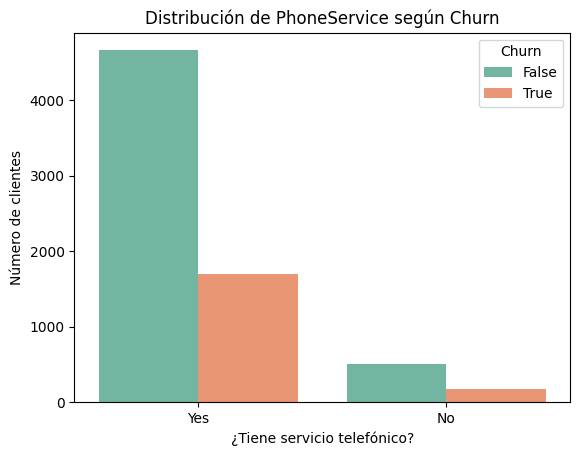

In [22]:
sns.countplot(data=datos, x='PhoneService', hue='Churn', palette='Set2')
plt.title("Distribución de PhoneService según Churn")
plt.xlabel("¿Tiene servicio telefónico?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_phoneservice_churn.png")
plt.show()


MultipleLines vs. Churn

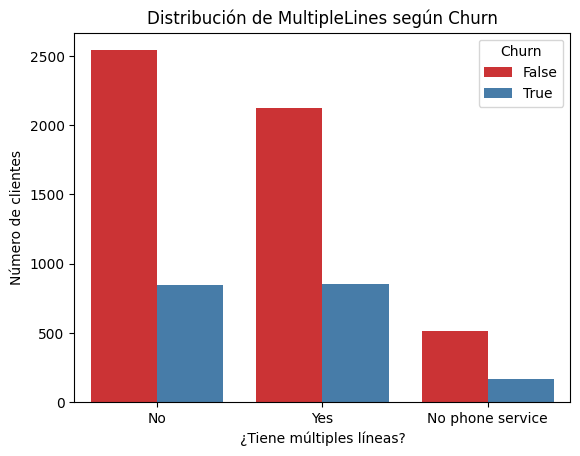

In [23]:
sns.countplot(data=datos, x='MultipleLines', hue='Churn', palette='Set1')
plt.title("Distribución de MultipleLines según Churn")
plt.xlabel("¿Tiene múltiples líneas?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_multiplelines_churn.png")
plt.show()


OnlineSecurity vs. Churn

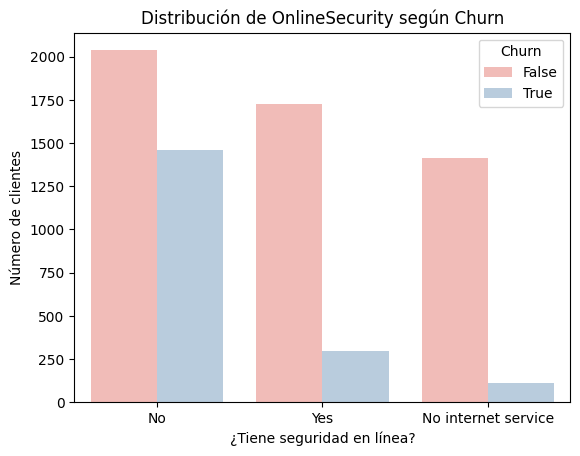

In [24]:
sns.countplot(data=datos, x='OnlineSecurity', hue='Churn', palette='Pastel1')
plt.title("Distribución de OnlineSecurity según Churn")
plt.xlabel("¿Tiene seguridad en línea?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_onlinesecurity_churn.png")
plt.show()


OnlineBackup vs. Churn

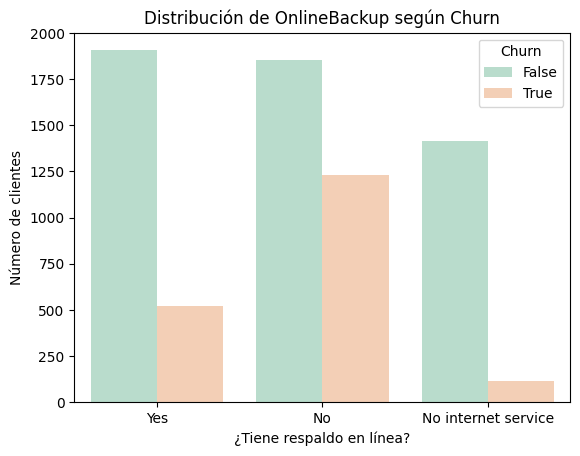

In [25]:
sns.countplot(data=datos, x='OnlineBackup', hue='Churn', palette='Pastel2')
plt.title("Distribución de OnlineBackup según Churn")
plt.xlabel("¿Tiene respaldo en línea?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_onlinebackup_churn.png")
plt.show()


DeviceProtection vs. Churn

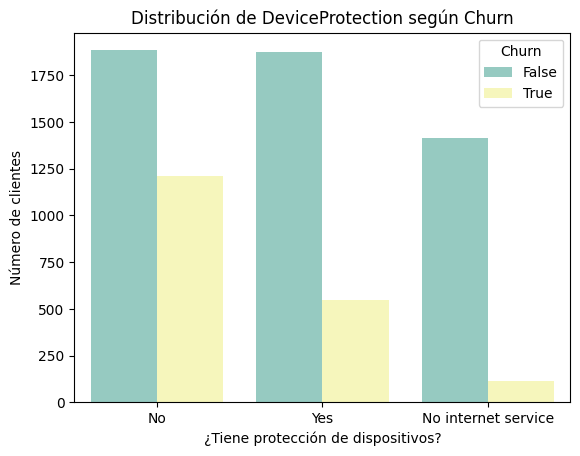

In [26]:
sns.countplot(data=datos, x='DeviceProtection', hue='Churn', palette='Set3')
plt.title("Distribución de DeviceProtection según Churn")
plt.xlabel("¿Tiene protección de dispositivos?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_deviceprotection_churn.png")
plt.show()


TechSupport vs. Churn

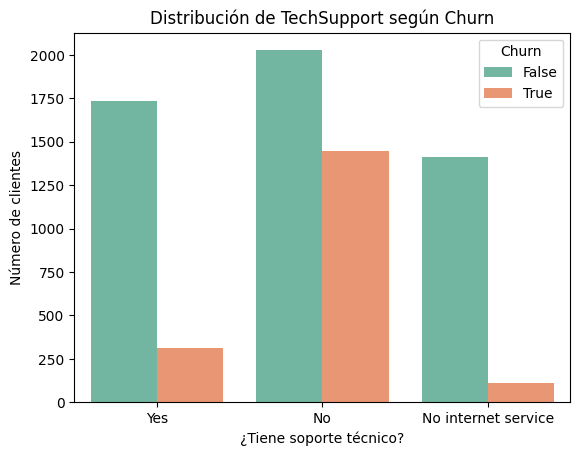

In [27]:
sns.countplot(data=datos, x='TechSupport', hue='Churn', palette='Set2')
plt.title("Distribución de TechSupport según Churn")
plt.xlabel("¿Tiene soporte técnico?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_techsupport_churn.png")
plt.show()


StreamingTV vs. Churn

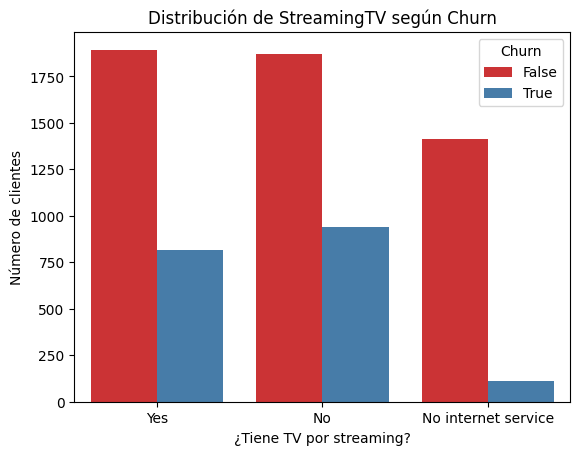

In [28]:
sns.countplot(data=datos, x='StreamingTV', hue='Churn', palette='Set1')
plt.title("Distribución de StreamingTV según Churn")
plt.xlabel("¿Tiene TV por streaming?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_streamingtv_churn.png")
plt.show()


StreamingMovies vs. Churn

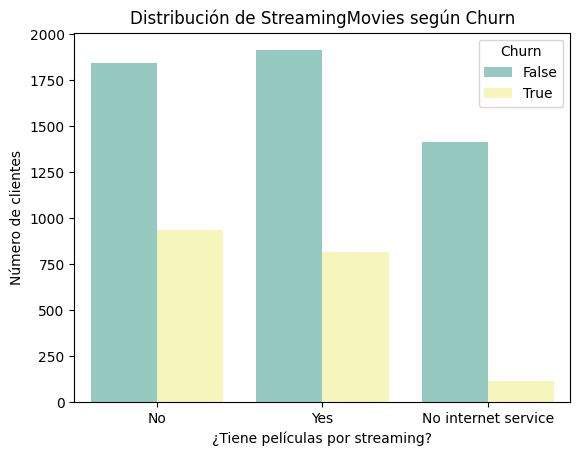

In [29]:
sns.countplot(data=datos, x='StreamingMovies', hue='Churn', palette='Set3')
plt.title("Distribución de StreamingMovies según Churn")
plt.xlabel("¿Tiene películas por streaming?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_streamingmovies_churn.png")
plt.show()


PaperlessBilling vs. Churn

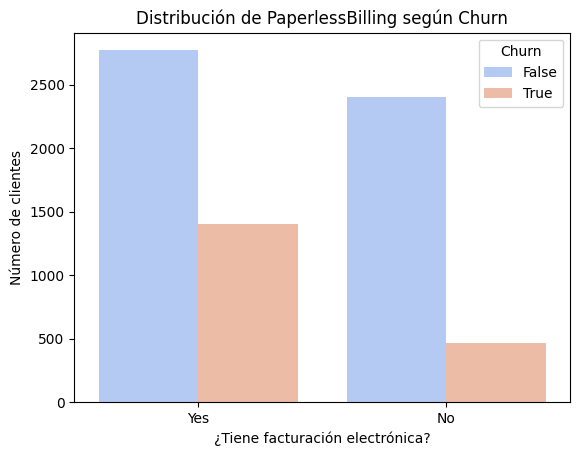

In [30]:
sns.countplot(data=datos, x='PaperlessBilling', hue='Churn', palette='coolwarm')
plt.title("Distribución de PaperlessBilling según Churn")
plt.xlabel("¿Tiene facturación electrónica?")
plt.ylabel("Número de clientes")
plt.savefig("catplot_paperlessbilling_churn.png")
plt.show()


**Variables de Servicios Contratados**
```
Esas variables reflejan qué servicios adicionales contrata el cliente:

- PhoneService	Casi todos los clientes lo tienen; no muestra variación relevante con churn.

- MultipleLines	Clientes con múltiples líneas tienen ligeramente más churn que los que no.

- OnlineSecurity	No tener seguridad en línea está fuertemente asociado con mayor churn.

- OnlineBackup	Tendencia similar: no contratarlo se asocia a mayor churn.

- DeviceProtection	Clientes sin protección de dispositivos tienen más churn, aunque con menos diferencia.

- TechSupport	No tener soporte técnico es un gran predictor de churn.

- StreamingTV	Tener o no TV por streaming no marca una gran diferencia, aunque los que no lo tienen cancelan más.

- StreamingMovies	Tendencia similar a StreamingTV, pero más neutral.

- PaperlessBilling	Clientes con facturación electrónica tienen más churn. Puede estar asociado a usuarios más activos/digital
```

**Interpretación general:**

Las variables de servicios adicionales son excelentes predictores de churn.
Especialmente:

    Falta de OnlineSecurity

    Falta de TechSupport

    No tener OnlineBackup

Estas variables podrían reflejar un menor compromiso con los servicios o descontento por la falta de valor agregado.

### Conclusión



Durante esta etapa inicial se exploraron las características principales del conjunto de datos, incluyendo la distribución y relación de variables numéricas y categóricas con la variable objetivo Churn. Este análisis permitió identificar patrones clave, así como variables con bajo o nulo aporte informativo.

Como resultado, se decidió eliminar las siguientes tres columnas:

    TotalCharges: Esta variable representa el acumulado total pagado por el cliente y está directamente derivada de MonthlyCharges × tenure. Dado que ambas variables base ya están presentes y activas, TotalCharges se considera redundante.

    Cuentas_diarias: Se trata de una variable artificial generada para resolver un proyecto anterior, sin conexión real con la lógica del negocio o el comportamiento del cliente. Por lo tanto, se elimina por no aportar valor al análisis actual.

    PhoneService: El análisis gráfico reveló que esta variable presenta una distribución altamente sesgada, con la mayoría de los clientes teniendo el mismo valor (“Yes”). Su baja variabilidad y escasa relación con el Churn justifican su exclusión en esta etapa.

Estas eliminaciones no solo simplifican el modelo de datos, sino que refuerzan el principio de parsimony, manteniendo únicamente aquellas variables con potencial valor predictivo o estratégico.

El conjunto de datos limpio se almacena como datos_v1 y servirá como base para la siguiente fase del proyecto.

In [31]:
# Eliminamos columnas irrelevantes
columnas_a_eliminar = ['TotalCharges', 'Cuentas_diarias', 'PhoneService']
datos_v1 = datos.drop(columns=columnas_a_eliminar)

# Verificamos las columnas resultantes
print("Columnas restantes:", datos_v1.columns.tolist())
print("Shape del nuevo dataframe:", datos_v1.shape)


Columnas restantes: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
Shape del nuevo dataframe: (7043, 18)


## FASE 1: Preparación de los Datos (Limpieza y Codificación)

### 1.1 Verificación de tipos de datos

In [32]:
datos_v1.dtypes

,0
Churn,bool
gender,object
SeniorCitizen,bool
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


### 1.2 Confirmación de valores nulos

In [33]:
datos_v1.isnull().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### 1.3 Codificación de variables categóricas y separación de las "features" con el "targetr"

Al hacer el dropped de las columnas, las variables de typo Category se transformaron en objeto nuevamente. Antes de la codificación para el modelo se revierten a categoría.

In [34]:
# Convertir columnas object a category en datos_v1
object_columns_v1 = datos_v1.select_dtypes(include=['object']).columns
for col in object_columns_v1:
    datos_v1[col] = datos_v1[col].astype('category')

# Crear datos_v2 como una copia de datos_v1
datos_v2 = datos_v1.copy()

# Verificación de tipos de datos en datos_v2
print("Tipos de datos en datos_v2 después de la conversión:")
print(datos_v2.dtypes)

# Guardar el DataFrame datos_v2
output_filename_v2 = 'datos_v2.csv'
datos_v2.to_csv(output_filename_v2, index=False)
print(f"\nDataFrame guardado como '{output_filename_v2}'")

Tipos de datos en datos_v2 después de la conversión:
Churn                   bool
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure                 int64
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
dtype: object

DataFrame guardado como 'datos_v2.csv'


In [35]:
# Identify columns with exactly two categories
two_category_cols = [col for col in datos_v2.columns if datos_v2[col].nunique() == 2]

# Add 'SeniorCitizen' if it's not already in the list (it should be)
if 'SeniorCitizen' not in two_category_cols:
    two_category_cols.append('SeniorCitizen')

print("Variables with exactly two categories (including SeniorCitizen):")
print(two_category_cols)

Variables with exactly two categories (including SeniorCitizen):
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']


In [36]:
# Identify categorical columns in datos_v2
categorical_cols_v2 = datos_v2.select_dtypes(include=['category']).columns

# Filter for columns with 3 or more unique categories
three_plus_categories = [col for col in categorical_cols_v2 if datos_v2[col].nunique() >= 3]

print("Variables with 3 or more categories:")
print(three_plus_categories)

Variables with 3 or more categories:
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


Tenemos múltiples variables categóricas (tipo category o object) que necesitan transformarse para alimentar los modelos.
Estrategia:

    Si la variable tiene 2 categorías → LabelEncoder

    Si tiene 3 o más → One-hot encoding (sin crear columna dummy para evitar multicolinealidad)

Variables con 2 categorías (label encoding):

    gender

    Partner

    Dependents

    OnlineSecurity

    OnlineBackup

    DeviceProtection

    TechSupport

    StreamingTV

    StreamingMovies

    PaperlessBilling


Variables con 3 o más categorías (one-hot encoding):

    MultipleLines
    
    InternetService
    
    OnlineSecurity
    
    OnlineBackup
    
    DeviceProtection
    
    TechSupport
    
    StreamingTV
    
    StreamingMovies
    
    Contract
    
    PaymentMethod

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Separate target variable
y = datos_v2['Churn']
X = datos_v2.drop('Churn', axis=1)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['category']).columns

# Apply Label Encoding for binary categorical columns
label_encode_cols = [col for col in categorical_cols if X[col].nunique() == 2]
for col in label_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Apply One-Hot Encoding for categorical columns with more than 2 categories
one_hot_encode_cols = [col for col in categorical_cols if X[col].nunique() > 2]
X = pd.get_dummies(X, columns=one_hot_encode_cols, drop_first=True)

# Convert boolean columns (SeniorCitizen) to int if not already handled by LabelEncoder
# LabelEncoder handles boolean, but double check
bool_cols = X.select_dtypes(include=['bool']).columns
for col in bool_cols:
    X[col] = X[col].astype(int)


# Display the first few rows and the data types of the transformed DataFrame
print("Transformed DataFrame (X) head:")
display(X.head())
print("\nTransformed DataFrame (X) dtypes:")
print(X.dtypes)
print("\nTarget variable (y) head:")
display(y.head())
print("\nTarget variable (y) dtypes:")
print(y.dtypes)

Transformed DataFrame (X) head:


,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,65.6,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,9,0,59.9,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,4,1,73.9,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,98.0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,1,1,0,3,1,83.9,0,0,1,...,1,0,1,0,0,0,0,0,0,1



Transformed DataFrame (X) dtypes:
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PaperlessBilling                           int64
MonthlyCharges                           float64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes                            int64
StreamingTV_No internet service   

,Churn
0,False
1,False
2,True
3,True
4,True



Target variable (y) dtypes:
bool


In [38]:
# Save the transformed DataFrame X to a CSV file
output_filename_X = 'data.csv'
X.to_csv(output_filename_X, index=False)

print(f"Transformed DataFrame X saved as '{output_filename_X}'")

Transformed DataFrame X saved as 'data.csv'


### 1.4 Normalizando MonthlyCharges y tenure

In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the DataFrame X (assuming it was saved as 'data.csv')
X = pd.read_csv('data.csv')

# Initialize the StandardScaler
scaler = StandardScaler()

# Identify the numerical columns to normalize
numerical_cols = ['tenure', 'MonthlyCharges']

# Apply StandardScaler to the numerical columns
# We fit and transform the selected columns and then replace them in the original DataFrame X
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Display the first few rows of the transformed DataFrame X to verify
print("Transformed DataFrame (X) head after normalization:")
display(X.head())

# Verify the mean and standard deviation of the normalized columns
print("\nMean of normalized numerical columns:")
print(X[numerical_cols].mean())
print("\nStandard deviation of normalized numerical columns:")
print(X[numerical_cols].std())

Transformed DataFrame (X) head after normalization:


,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,-0.951682,1,0.027862,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,-0.951682,0,-0.161583,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.155283,1,0.303720,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,-0.788800,1,1.104706,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,1,1,0,-1.196004,1,0.636080,0,0,1,...,1,0,1,0,0,0,0,0,0,1



Mean of normalized numerical columns:
tenure           -2.824818e-17
MonthlyCharges   -6.658501e-17
dtype: float64

Standard deviation of normalized numerical columns:
tenure            1.000071
MonthlyCharges    1.000071
dtype: float64


In [40]:
# Save the transformed DataFrame X to a CSV file with the specified name
output_filename = 'data_2.csv'
X.to_csv(output_filename, index=False)

print(f"DataFrame with normalized numerical columns saved as '{output_filename}'")

DataFrame with normalized numerical columns saved as 'data_2.csv'


### 1.5 Checando el balance de los datos de Churn

In [41]:
# Check the distribution of the target variable 'Churn'
churn_distribution = y.value_counts()

print("Distribution of the 'Churn' variable:")
print(churn_distribution)

# Calculate the proportion of each class
churn_proportion = y.value_counts(normalize=True) * 100

print("\nProportion of each 'Churn' class:")
print(churn_proportion)

Distribution of the 'Churn' variable:
Churn
False    5174
True     1869
Name: count, dtype: int64

Proportion of each 'Churn' class:
Churn
False    73.463013
True     26.536987
Name: proportion, dtype: float64


El resultado muestra que aproximadamente el 73.5% de los clientes no se dio de baja (False), y aproximadamente el 26.5% sí se dio de baja (True). Esto indica que tu conjunto de datos está moderadamente desequilibrado. Lo cual impacta de la siguiente manera:


Elección de métricas de evaluación adecuadas: La precisión puede ser engañosa. Necesitaremos centrarnos en métricas que ofrezcan una mejor imagen del rendimiento del modelo en la clase minoritaria (Churn=True). Estas incluyen:

    Exhaustividad (Recall/Sensibilidad): De todos los clientes que realmente se dieron de baja, ¿cuántos identificó correctamente el modelo?

    Puntuación F1 (F1-Score): La media armónica de la Precisión y la Exhaustividad, proporcionando un equilibrio entre ambas.

    ROC-AUC: Mide la capacidad del modelo para distinguir entre las dos clases.

Considerar técnicas de remuestreo: Dependiendo de los modelos que elijamos y de su rendimiento inicial, podríamos considerar técnicas para abordar el desequilibrio durante la fase de modelado. Estas incluyen:

    Sobremuestreo de la clase minoritaria: Crear ejemplos sintéticos de la clase minoritaria (por ejemplo, usando técnicas como SMOTE) para aumentar su representación en los datos de entrenamiento.

    Submuestreo de la clase mayoritaria: Eliminar aleatoriamente ejemplos de la clase mayoritaria para reducir su representación.

Podemos empezar entrenando modelos con los datos desequilibrados actuales y luego evaluar su rendimiento utilizando las métricas adecuadas. Si a los modelos les cuesta predecir la clase minoritaria, entonces podemos experimentar con técnicas de remuestreo para ver si mejora el rendimiento.

Así que, por ahora, tendremos en cuenta el desequilibrio, seleccionaremos las métricas de evaluación correctas para la Fase 4 y decidiremos sobre las técnicas de remuestreo si son necesarias durante o antes de la Fase 3 (Modelado).



## FASE 2: Análisis Exploratorio y Correlación


Comprender el comportamiento de las variables y su relación con la cancelación.


### 2.1 Verificación de Datos

Confirmar la estructura, ausencia de nulos y el resultado de las transformaciones en el DataFrame X.


In [42]:
# Check the shape of the transformed DataFrame X
print("Shape of the transformed DataFrame X:", X.shape)

# Check for any missing values in X
print("\nMissing values in the transformed DataFrame X:")
print(X.isnull().sum().sum())

# Check unique values and counts for a few transformed columns
print("\nUnique values and counts for selected transformed columns:")
for col in ['gender', 'SeniorCitizen', 'Partner', 'InternetService_Fiber optic', 'Contract_Two year']:
    if col in X.columns:
        print(f"\n--- {col} ---")
        print(X[col].value_counts())
    else:
        print(f"\n--- {col} ---")
        print(f"Column '{col}' not found in X.")

Shape of the transformed DataFrame X: (7043, 28)

Missing values in the transformed DataFrame X:
0

Unique values and counts for selected transformed columns:

--- gender ---
gender
1    3555
0    3488
Name: count, dtype: int64

--- SeniorCitizen ---
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

--- Partner ---
Partner
0    3641
1    3402
Name: count, dtype: int64

--- InternetService_Fiber optic ---
InternetService_Fiber optic
0    3947
1    3096
Name: count, dtype: int64

--- Contract_Two year ---
Contract_Two year
0    5348
1    1695
Name: count, dtype: int64


### 2.2 correlación de variables con churn

Calcular la correlación de todas las variables en X con la variable objetivo y (Churn) y presentar los resultados ordenados.

In [43]:
# Calculate correlations between features in X and the target y
correlations_with_churn = X.corrwith(y).sort_values(ascending=False)

# Print the sorted correlations
print("Correlations with Churn (sorted):")
print(correlations_with_churn)

Correlations with Churn (sorted):
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226
Contract_One year                       -0.177820
InternetService_

Del análisis de correlación, observamos que:

    Las variables con mayor correlación positiva con Churn (mayor probabilidad de cancelación) son InternetService_Fiber optic y PaymentMethod_Electronic check. Esto sugiere que los clientes con servicio de fibra óptica y aquellos que pagan con cheque electrónico tienden a cancelar más.
    
    
    Las variables con mayor correlación negativa con Churn (menor probabilidad de cancelación) son tenure (antigüedad del cliente) y Contract_Two year (contrato a dos años). Esto indica que los clientes con más tiempo en la empresa y aquellos con contratos a largo plazo son menos propensos a cancelar.
    
    
    Variables como gender y las relacionadas con MultipleLines mostraron correlaciones muy bajas, sugiriendo que tienen una relación lineal débil con la cancelación. Esto las convierte en posibles candidatas a ser consideradas menos importantes o incluso eliminadas en futuras etapas de modelado, aunque siempre es bueno reconfirmar su impacto en el modelo final.

En resumen, la antigüedad, el tipo de contrato, el servicio de internet y el método de pago parecen ser factores más fuertemente asociados con la probabilidad de que un cliente cancele su servicio.

### 2.3 matriz de correlación (heatmap)



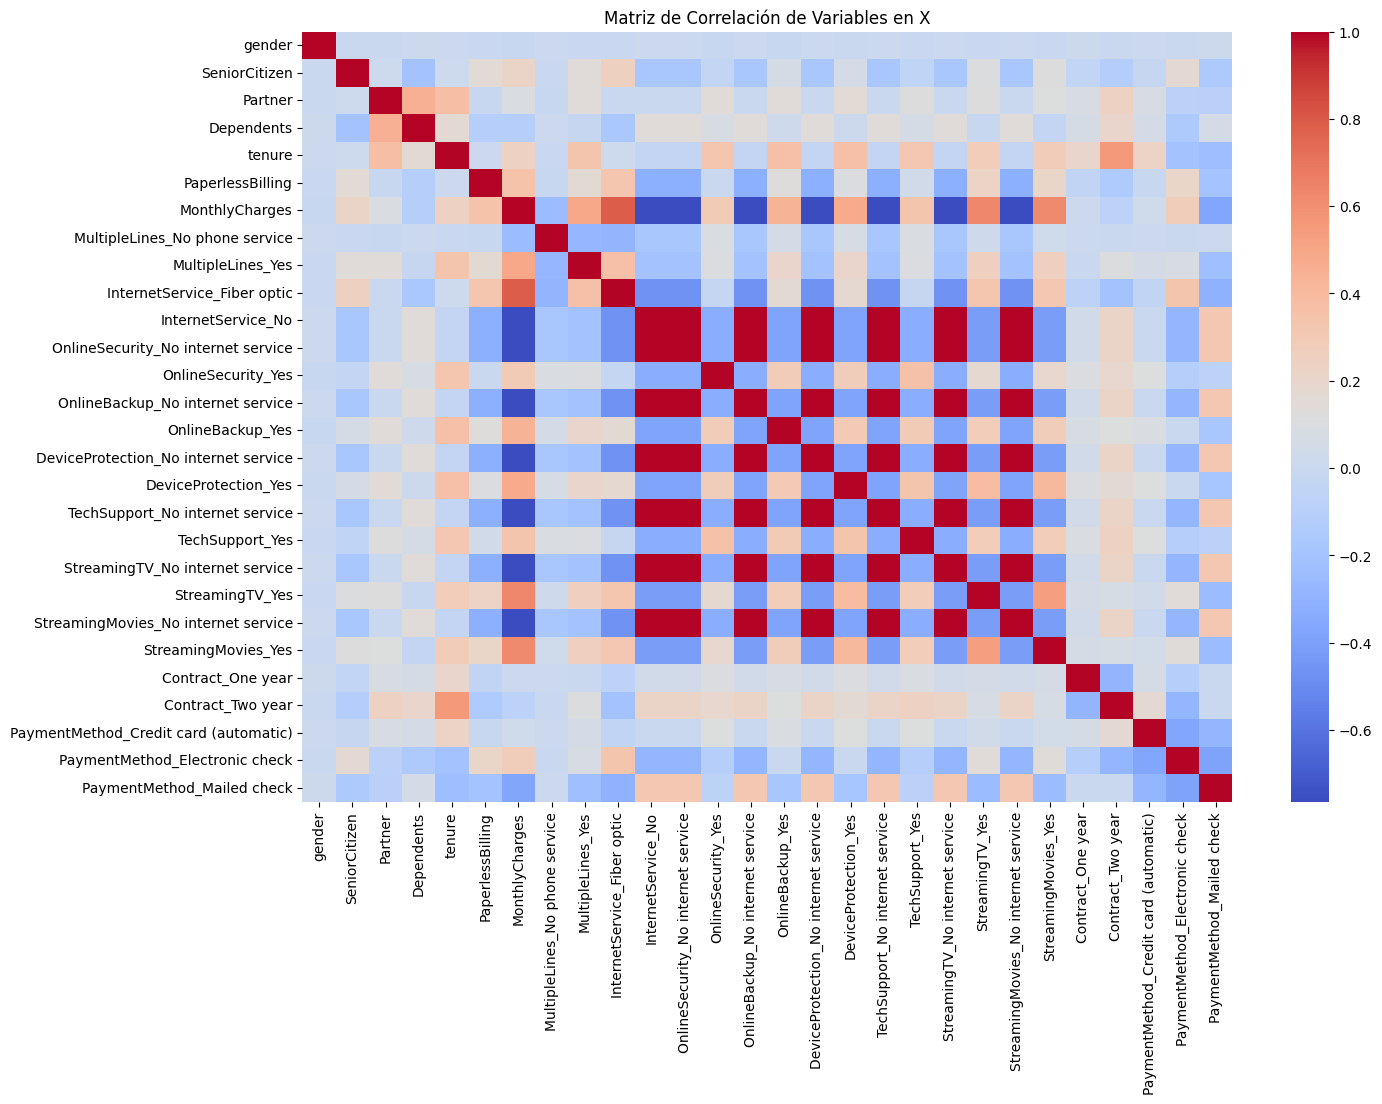

In [44]:
# Calculate the correlation matrix for the DataFrame X
correlation_matrix_X = X.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_X, cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación de Variables en X")

# Save the heatmap
plt.savefig("heatmap_correlation_X.png")

# Display the heatmap
plt.show()

### 2.4 Multicolinealidad

La multicolinealidad perfecta ocurre cuando dos o más variables predictoras en un modelo de regresión están perfectamente correlacionadas, lo que significa que una puede ser linealmente predicha a partir de la otra(s). Multicolinealidad ocasiona:

1.  **Inestabilidad del Modelo:** La multicolinealidad perfecta hace que sea imposible que el modelo de regresión (como la regresión logística que podríamos usar) estime de manera confiable los coeficientes de las variables. Esto se debe a que hay infinitas combinaciones de coeficientes que podrían explicar la varianza en la variable dependiente, lo que lleva a resultados inestables y poco fiables.

2.  **Interpretación Dificultosa:** Cuando las variables están perfectamente correlacionadas, es imposible determinar el efecto único de cada variable sobre la variable objetivo. El modelo no puede distinguir la contribución individual de cada predictor.

3.  **Redundancia:** Si dos variables tienen una correlación perfecta de 1 o -1, esencialmente están proporcionando la misma información al modelo. Mantener ambas es redundante y no añade valor predictivo, solo complejidad e inestabilidad.

En este caso, el análisis de correlación identificó pares de variables con una correlación absoluta de 1, como aquellas relacionadas con la ausencia de servicio de internet (InternetService_No) y la ausencia de varios servicios adicionales (como seguridad en línea, respaldo, etc.). Esto tiene sentido, ya que si un cliente no tiene servicio de internet, lógicamente tampoco tendrá servicios que dependan de internet. Para construir modelos estables y fáciles de interpretar, es necesario eliminar una de las variables de cada par perfectamente correlacionado.

In [45]:
import numpy as np

# Calculate the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix_X.abs()

# Stack the correlation matrix to easily filter
stacked_correlations = abs_correlation_matrix.stack()


high_correlations = stacked_correlations[(stacked_correlations == 1) & (stacked_correlations.index.get_level_values(0) != stacked_correlations.index.get_level_values(1))]

print("Variables with perfect multicollinearity (absolute correlation = 1):")
if high_correlations.empty:
    print("No pairs with perfect multicollinearity found.")
else:

    high_correlations = high_correlations.sort_index()
    unique_high_correlations = high_correlations[~high_correlations.index.duplicated()]
    print(unique_high_correlations)

Variables with perfect multicollinearity (absolute correlation = 1):
DeviceProtection_No internet service  InternetService_No                      1.0
                                      OnlineBackup_No internet service        1.0
                                      OnlineSecurity_No internet service      1.0
                                      StreamingMovies_No internet service     1.0
                                      StreamingTV_No internet service         1.0
                                      TechSupport_No internet service         1.0
InternetService_No                    DeviceProtection_No internet service    1.0
                                      OnlineBackup_No internet service        1.0
                                      OnlineSecurity_No internet service      1.0
                                      StreamingMovies_No internet service     1.0
                                      StreamingTV_No internet service         1.0
                             

In [46]:

columns_to_drop_multicollinearity = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]

# Asegurarse de que las columnas existan en el DataFrame X antes de eliminarlas
existing_columns_to_drop = [col for col in columns_to_drop_multicollinearity if col in X.columns]

# Eliminar las columnas identificadas por multicolinealidad perfecta del DataFrame X
X_cleaned = X.drop(columns=existing_columns_to_drop)

# Verificar las columnas restantes en el nuevo DataFrame
print("Columnas restantes después de eliminar la multicolinealidad:")
print(X_cleaned.columns.tolist())

# Verificar la forma del nuevo DataFrame
print("\nShape del DataFrame X_cleaned:", X_cleaned.shape)

# Guardar el DataFrame limpio con un nuevo nombre
output_filename_cleaned = 'model_x.csv'
X_cleaned.to_csv(output_filename_cleaned, index=False)
print(f"\nDataFrame limpio guardado como '{output_filename_cleaned}'")

Columnas restantes después de eliminar la multicolinealidad:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

Shape del DataFrame X_cleaned: (7043, 22)

DataFrame limpio guardado como 'model_x.csv'


### 2.5 Distribuciones de variables clave por Churn

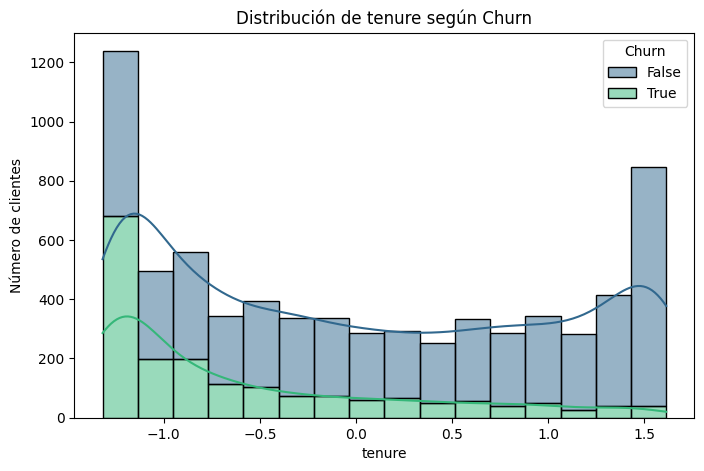

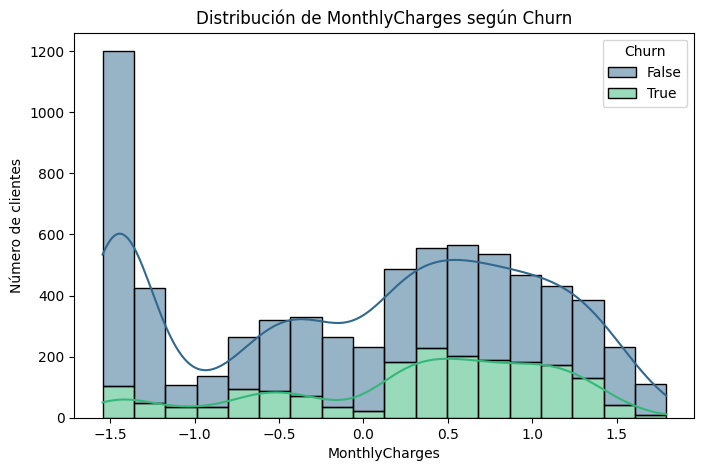

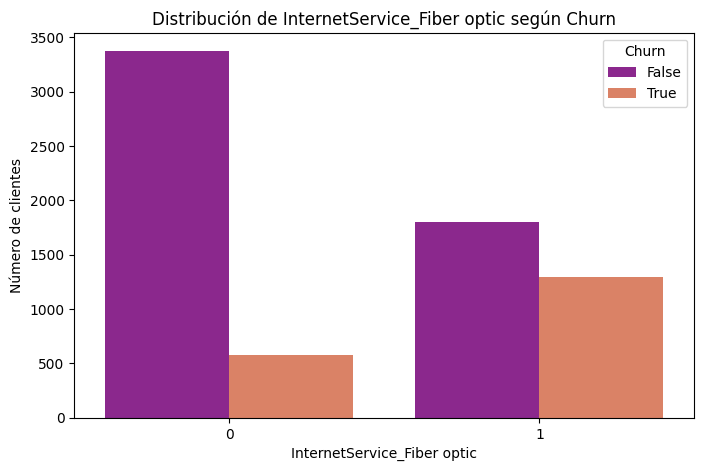

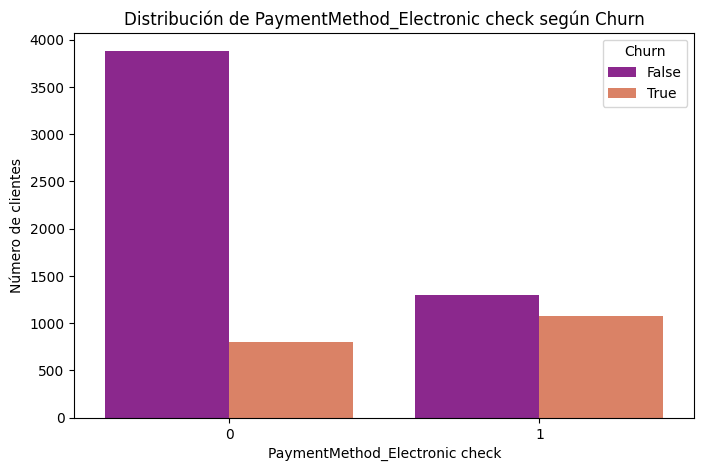

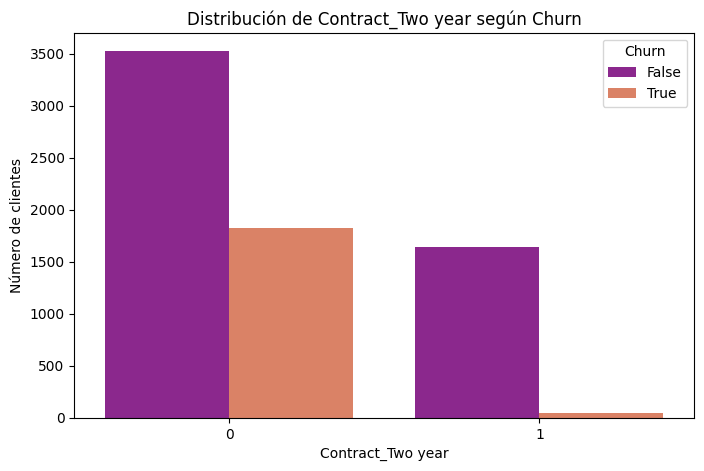

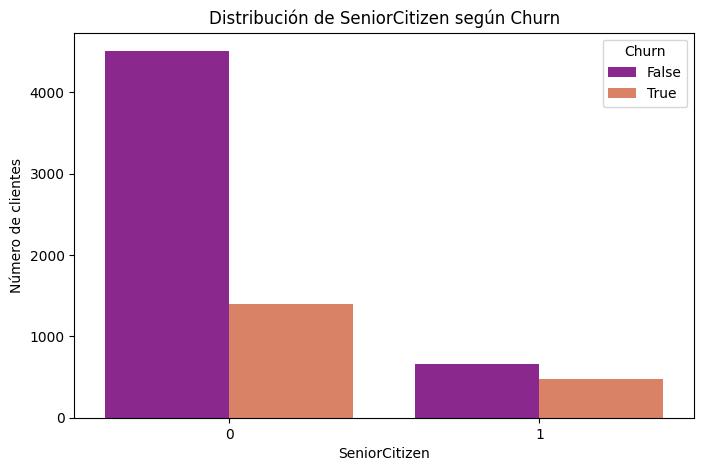

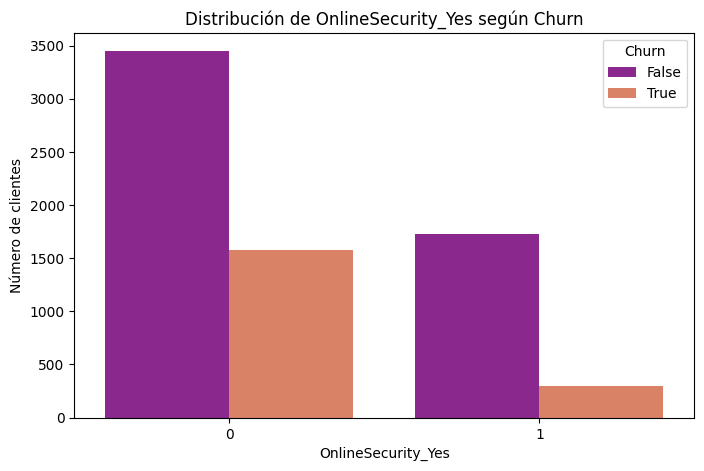

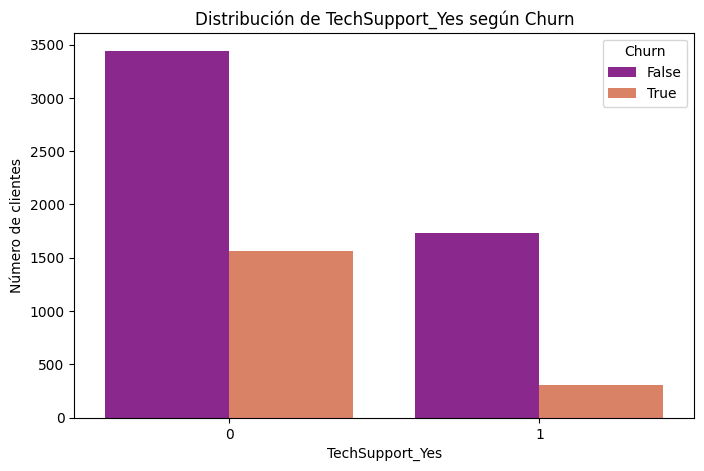

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key variables to visualize distributions by Churn
key_variables = [
    'tenure',
    'MonthlyCharges',
    'InternetService_Fiber optic',
    'PaymentMethod_Electronic check',
    'Contract_Two year',
    'SeniorCitizen',
    'OnlineSecurity_Yes',
    'TechSupport_Yes'
]

# Ensure all key variables are in the cleaned DataFrame X_cleaned
existing_key_variables = [col for col in key_variables if col in X_cleaned.columns]

# Plot distributions for numerical key variables (tenure and MonthlyCharges)
numerical_key_vars = ['tenure', 'MonthlyCharges']
for col in numerical_key_vars:
    if col in existing_key_variables:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=X_cleaned, x=col, hue=y, multiple='stack', kde=True, palette='viridis')
        plt.title(f"Distribución de {col} según Churn")
        plt.xlabel(col)
        plt.ylabel("Número de clientes")
        plt.savefig(f"hist_{col}_churn_cleaned.png")
        plt.show()
    else:
        print(f"Numerical column '{col}' not found in X_cleaned.")


# Plot distributions for categorical/binary key variables
categorical_key_vars = [col for col in existing_key_variables if col not in numerical_key_vars]
for col in categorical_key_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=X_cleaned, x=col, hue=y, palette='plasma')
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel(col)
    plt.ylabel("Número de clientes")
    plt.savefig(f"catplot_{col}_churn_cleaned.png")
    plt.show()

**Hallazgos**
```   
- tenure: El histograma muestra claramente que los clientes con menor permanencia (pocos meses) tienen una tasa de Churn significativamente más alta. A medida que aumenta el tiempo de permanencia, la proporción de clientes que no cancelan es mucho mayor. Esto refuerza la idea de que la lealtad del cliente se construye con el tiempo.
- MonthlyCharges: El histograma indica que los clientes con cargos mensuales más altos tienden a tener una mayor proporción de Churn. Los clientes con cargos más bajos son menos propensos a cancelar. Esto sugiere que el costo del servicio es un factor importante en la decisión de un cliente de irse.
- InternetService_Fiber optic: El gráfico de barras para esta variable (que es binaria después de la codificación) muestra que una proporción mucho mayor de clientes con servicio de Fibra Óptica cancela en comparación con aquellos que no tienen este servicio (o tienen otro tipo como DSL). Esto podría indicar problemas de calidad, precio o expectativas con el servicio de fibra.
- PaymentMethod_Electronic check: De manera similar, el gráfico de barras para el cheque electrónico revela que este método de pago está asociado con una mayor tasa de Churn. Los clientes que pagan con cheque electrónico son más propensos a cancelar que aquellos que usan otros métodos como tarjetas de crédito o transferencia bancaria automática.
- Contract_Two year: Esta gráfica muestra que los clientes con un contrato de dos años tienen una tasa de Churn significativamente baja en comparación con aquellos que no tienen este tipo de contrato (probablemente contratos mensuales). Esto subraya la importancia de los contratos a largo plazo como mecanismo de retención.
- SeniorCitizen: El gráfico indica que, aunque son un grupo minoritario, los ciudadanos senior tienen una tasa de Churn proporcionalmente más alta que los no seniors.
- OnlineSecurity_Yes: El gráfico muestra que los clientes que no tienen el servicio de Online Security (es decir, OnlineSecurity_Yes es 0) tienen una tasa de Churn mucho mayor que aquellos que sí lo tienen. Este servicio parece ser un factor importante para la retención.
- TechSupport_Yes: De forma similar a Online Security, los clientes que no tienen Tech Support (TechSupport_Yes es 0) presentan una tasa de Churn considerablemente más alta que aquellos con soporte técnico. Esto sugiere que un buen soporte técnico es crucial para evitar cancelaciones.
```

Las visualizaciones confirman los hallazgos del análisis de correlación. Variables como la permanencia, el tipo de contrato a largo plazo y tener servicios de seguridad y soporte técnico son fuertes indicadores de menor Churn. Por otro lado, tener servicio de Fibra Óptica, pagar con cheque electrónico, tener cargos mensuales altos y ser ciudadano senior están asociados con un mayor Churn.

Estos insights son muy valiosos para entender qué factores impulsan la cancelación y serán útiles en las siguientes fases de modelado e interpretación.

## FASE 3: MODELADO Y EVALUACIÓN

Para abordar el desafío de predecir la cancelación de clientes (Churn) en Telecom X, se ha diseñado la siguiente estrategia que combina la eficiencia de una división inicial con la robustez de la validación cruzada.

Esta estrategia se basa en los siguientes puntos clave:


- **División Inicial de Datos (80/20 Estratificada):** Como primer paso, se divide el conjunto de datos limpio y transformado (model_x y y) en conjuntos de entrenamiento (80%) y prueba (20%) utilizando train_test_split. Es crucial destacar que esta división se realizó de manera estratificada sobre la variable objetivo (y - Churn), garantizando que la proporción de clientes que cancelan sea la misma en el conjunto de entrenamiento y en el conjunto de prueba, lo cual es fundamental dado que nuestro dataset está desbalanceado. El conjunto de prueba (X_test, y_test) será reservado y utilizado únicamente para la evaluación final del rendimiento de los modelos seleccionados.

- **Validación Cruzada Estratificada (k=10):** Para obtener una estimación más fiable y robusta del rendimiento de los modelos propuestos durante la fase de desarrollo y ajuste, se utilizará la validación cruzada estratificada con k=10 folds. En esta técnica, el conjunto de entrenamiento (el 80% de los datos iniciales) se dividirá en 10 subconjuntos (folds). El modelo se entrenará 10 veces, utilizando en cada iteración 9 folds para el entrenamiento y 1 fold para la validación. La estratificación garantiza que cada uno de los 10 folds mantenga una proporción similar de la clase Churn, lo cual es vital para una evaluación precisa en presencia de desbalance. El rendimiento final reportado por la validación cruzada será el promedio de las 10 iteraciones. Esta técnica nos ayuda a reducir la variabilidad en la estimación del rendimiento y a detectar si un modelo se sobreajusta a una partición particular de los datos.

- **Selección de Modelos de Clasificación:** Los siguientes modelos cuentan con capacidades y enfoques distintos:

        Random Forest: Un potente modelo de ensamble basado en árboles de decisión, que servirá como nuestra línea base por su robustez y capacidad para manejar datos variados.

        XGBoost: Una implementación avanzada y altamente eficiente de Gradient Boosting, conocida por alcanzar resultados de vanguardia en tareas de clasificación y su capacidad para manejar desbalance de clases.
        
        Support Vector Machine (SVM) con Kernel RBF: Un modelo basado en hiperplanos que, utilizando el kernel RBF, puede aprender fronteras de decisión no lineales complejas, ofreciendo una perspectiva de modelado diferente a los enfoques basados en árboles.



### 3.1 Dividir Datos


Divide los datos model_x e y en conjuntos de entrenamiento y prueba estratificados (80% para entrenamiento, 20% para prueba).

In [48]:
from sklearn.model_selection import train_test_split

# Divide en training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Estratificando la división de datos
)

# Corrobora la división
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 22)
Shape of X_test: (1409, 22)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


### 3.2 Entrenar y evaluar modelos con validación cruzada.

Se entrena los tres modelos de clasificación seleccionados (RandomForestClassifier, XGBoost y SVM) utilizando validación cruzada k-fold estratificada (k=10) en los datos de entrenamiento. Evalúa su rendimiento basándote en las puntuaciones de la validación cruzada (por ejemplo, Recall promedio, F1-Score y ROC-AUC en todos los pliegues).


In [49]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Define los modelos a evaluar
models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('SVM', SVC(random_state=42, probability=True))
]

# Se inicia StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Scoring metrics
scoring = ['recall', 'f1', 'roc_auc']

# Dictionario para guardar los resultados de la validación cruzada
cv_results = {}

# Validación cruzada
for name, model in models:
    print(f"Performing cross-validation for {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    print(f"{name} - Cross-Validation Results:")
    print(f"  Mean Recall: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    print(f"  Mean F1-Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
    print(f"  Mean ROC-AUC: {np.mean(roc_auc_scores):.4f} (+/- {np.std(roc_auc_scores):.4f})")
    print("-" * 30)

    # Resultados
    cv_results[name] = {
        'Recall_Mean': np.mean(scores),
        'Recall_Std': np.std(scores),
        'F1_Mean': np.mean(f1_scores),
        'F1_Std': np.std(f1_scores),
        'ROC_AUC_Mean': np.mean(roc_auc_scores),
        'ROC_AUC_Std': np.std(roc_auc_scores)
    }

# Se mejora el display de los resultados
import pandas as pd
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results Summary:")
display(cv_results_df)

Performing cross-validation for RandomForest...
RandomForest - Cross-Validation Results:
  Mean Recall: 0.4742 (+/- 0.0399)
  Mean F1-Score: 0.5388 (+/- 0.0383)
  Mean ROC-AUC: 0.8149 (+/- 0.0224)
------------------------------
Performing cross-validation for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:34:33] WARNING: /w

XGBoost - Cross-Validation Results:
  Mean Recall: 0.5231 (+/- 0.0417)
  Mean F1-Score: 0.5646 (+/- 0.0385)
  Mean ROC-AUC: 0.8184 (+/- 0.0209)
------------------------------
Performing cross-validation for SVM...
SVM - Cross-Validation Results:
  Mean Recall: 0.4943 (+/- 0.0403)
  Mean F1-Score: 0.5699 (+/- 0.0386)
  Mean ROC-AUC: 0.7977 (+/- 0.0256)
------------------------------

Cross-Validation Results Summary:


,Recall_Mean,Recall_Std,F1_Mean,F1_Std,ROC_AUC_Mean,ROC_AUC_Std
RandomForest,0.474237,0.039909,0.538764,0.038327,0.814926,0.022369
XGBoost,0.523119,0.041716,0.564638,0.038483,0.818386,0.020879
SVM,0.494295,0.040260,0.569922,0.038631,0.797675,0.025627


### 3.3 Comparación de Modelos

Comparar el rendimiento de los tres modelos basándote en los resultados de la validación cruzada.

/tmp/ipython-input-388009187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_results_df.index, y='Recall_Mean', data=cv_results_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-388009187.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_results_df.index, y='F1_Mean', data=cv_results_df, ax=axes[1], palette='plasma')
/tmp/ipython-input-388009187.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_results_df.index, y='ROC_AUC_Mean', data=cv_results_df, ax=axes[2], palette='magma')


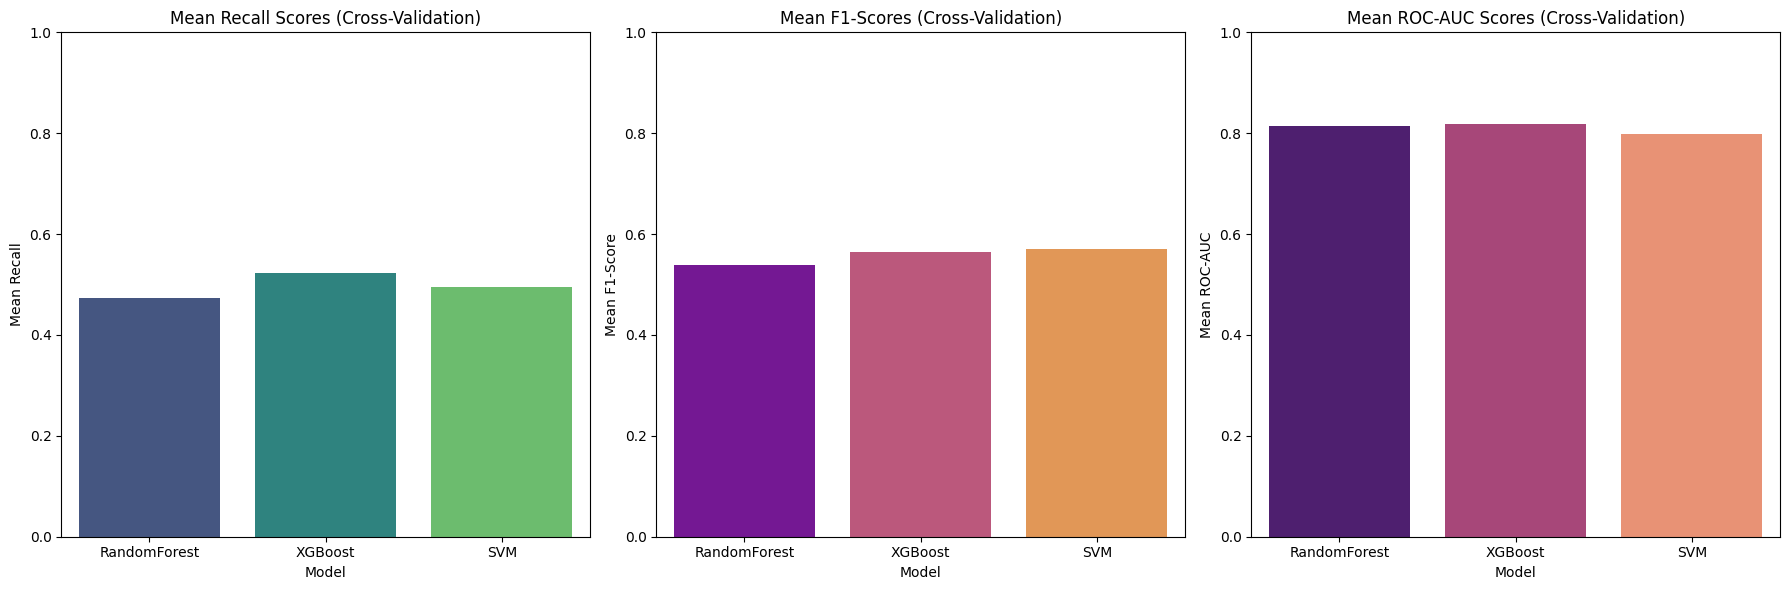

In [50]:
# Gráfica de comparación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Fráfica de  Recall
sns.barplot(x=cv_results_df.index, y='Recall_Mean', data=cv_results_df, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Recall Scores (Cross-Validation)')
axes[0].set_ylabel('Mean Recall')
axes[0].set_xlabel('Model')
axes[0].set_ylim(0, 1)

# Gráfica F1
sns.barplot(x=cv_results_df.index, y='F1_Mean', data=cv_results_df, ax=axes[1], palette='plasma')
axes[1].set_title('Mean F1-Scores (Cross-Validation)')
axes[1].set_ylabel('Mean F1-Score')
axes[1].set_xlabel('Model')
axes[1].set_ylim(0, 1)

# Fráfica ROC-AUC
sns.barplot(x=cv_results_df.index, y='ROC_AUC_Mean', data=cv_results_df, ax=axes[2], palette='magma')
axes[2].set_title('Mean ROC-AUC Scores (Cross-Validation)')
axes[2].set_ylabel('Mean ROC-AUC')
axes[2].set_xlabel('Model')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.savefig("cv_results_comparison.png")
plt.show()

### 3.4 Selección del mejor Modelo

Elige el modelo con mejor rendimiento basándote en la comparación.

In [51]:
print("Cross-Validation Results Summary:")
display(cv_results_df)

# Determinando el mejor modelo

best_model_name = 'XGBoost'

print(f"\nBased on the cross-validation results, the best-performing model is: {best_model_name}")

Cross-Validation Results Summary:


,Recall_Mean,Recall_Std,F1_Mean,F1_Std,ROC_AUC_Mean,ROC_AUC_Std
RandomForest,0.474237,0.039909,0.538764,0.038327,0.814926,0.022369
XGBoost,0.523119,0.041716,0.564638,0.038483,0.818386,0.020879
SVM,0.494295,0.040260,0.569922,0.038631,0.797675,0.025627



Based on the cross-validation results, the best-performing model is: XGBoost


### 3.5 Optimización de hiperparámetros

Realiza la optimización de hiperparámetros en el modelo seleccionado (XGBoost) utilizando validación cruzada estratificada en los datos de entrenamiento.

In [52]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

# Se Inicia el Modelo
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Parametros de distribución para RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# StratifiedKFold para validación cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,  # numero de parametros
    scoring='recall', # Priorizando Recall
    cv=skf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Starting RandomizedSearchCV for XGBoost...")
random_search.fit(X_train, y_train)

print("\nBest hyperparameters found:")
print(random_search.best_params_)

print("\nBest cross-validation score (Recall) achieved:")
print(random_search.best_score_)

best_xgb_model = random_search.best_estimator_
print("\nBest XGBoost estimator stored.")

Starting RandomizedSearchCV for XGBoost...
Fitting 10 folds for each of 50 candidates, totalling 500 fits

Best hyperparameters found:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}

Best cross-validation score (Recall) achieved:
0.5384966442953021

Best XGBoost estimator stored.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:39:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 3.6 Entrenando al Modelo Final

Entrena el modelo con mejor rendimiento (XGBoost con hiperparámetros optimizados) en todo el conjunto de entrenamiento (X_train, y_train).

**Reasoning**:
I will now instantiate the `XGBClassifier` with the best hyperparameters found in the previous step and train it on the entire training set. This will create the final model that will be used for evaluation on the test set.



In [53]:
best_hyperparameters = {
    'subsample': 1.0,
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.2,
    'gamma': 0.2,
    'colsample_bytree': 1.0
}

# Se inicia el modelo con los mejores hyperparámetros
final_xgb_model = XGBClassifier(
    **best_hyperparameters,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Entrenamiento final
final_xgb_model.fit(X_train, y_train)

print("Final XGBoost model training is complete.")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:39:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final XGBoost model training is complete.


### 3.7 Evaluación final del Modelo

Evalúa el modelo final entrenado (final_xgb_model) en el conjunto de prueba reservado (X_test, y_test) usando métricas apropiadas (Precisión, Exhaustividad, F1-Score, ROC-AUC, Matriz de Confusión).

Evaluation Metrics on the Test Set:
  Precision: 0.6218
  Recall: 0.5187
  F1-Score: 0.5656
  ROC-AUC Score: 0.8397

Confusion Matrix:
[[917 118]
 [180 194]]


<Figure size 800x600 with 0 Axes>

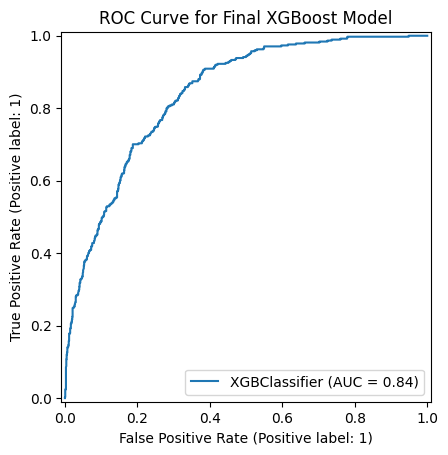

In [54]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             RocCurveDisplay)

# Predicciones
y_pred = final_xgb_model.predict(X_test)
y_pred_proba = final_xgb_model.predict_proba(X_test)[:, 1]

# Calcular e imprimir métricas
print("Evaluation Metrics on the Test Set:")
print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"  ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Matriz de confusión
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(final_xgb_model, X_test, y_test)
plt.title("ROC Curve for Final XGBoost Model")
plt.savefig("roc_curve_final_model.png")
plt.show()

**Resultados de la Validación Cruzada:**

Random Forest, XGBoost y SVM utilizando validación cruzada estratificada de 10 pliegues en los datos de entrenamiento. Las puntuaciones medias de la validación cruzada fueron:

    RandomForest: Recall: 0.4742, F1-Score: 0.5388, ROC-AUC: 0.8149

    XGBoost: Recall: 0.5231, F1-Score: 0.5646, ROC-AUC: 0.8184

    SVM: Recall: 0.4943, F1-Score: 0.5699, ROC-AUC: 0.7977

Según estos resultados, XGBoost mostró el mejor rendimiento, particularmente en términos de Recall y ROC-AUC, que son métricas importantes para el conjunto de datos desequilibrado y el objetivo de identificar a los clientes que se van.

**Entrenamiento del Modelo Final:**

Se seleccionó el modelo XGBoost y se realizó la optimización de hiperparámetros utilizando RandomizedSearchCV. Los mejores hiperparámetros encontrados fueron:
```
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
```

El modelo final de XGBoost se entrenó luego en todo el conjunto de entrenamiento (el 80% de los datos originales) usando estos mejores parámetros.

**Evaluación Final en el Conjunto de Prueba:**

El modelo final de XGBoost entrenado se evaluó en el conjunto de prueba reservado (el 20% de los datos originales). Las métricas de rendimiento en el conjunto de prueba fueron:

    Precisión: 0.6218

    Recall (Exhaustividad): 0.5187

    F1-Score: 0.5656

    Puntuación ROC-AUC: 0.8397

Matriz de Confusión:

```
[917 118]
[180 194]

(Verdaderos Negativos: 917, Falsos Positivos: 118, Falsos Negativos: 180, Verdaderos Positivos: 194)
```

**Interpretación de los Resultados Finales:**

- La puntuación ROC-AUC de 0.8397 indica que el modelo tiene una buena capacidad para distinguir entre clientes que se fueron y los que no.
- El Recall de 0.5187 significa que el modelo identificó correctamente a aproximadamente el 51.9% de los clientes que realmente se fueron en el conjunto de prueba. Esta es una métrica crucial para una tarea de predicción de abandono, ya que queremos capturar a la mayor cantidad posible de clientes en riesgo.
- La Precisión de 0.6218 indica que cuando el modelo predice que un cliente se irá, acierta aproximadamente el 62.2% de las veces.
- La Puntuación F1 de 0.5656 proporciona un equilibrio entre Precisión y Recall.

La matriz de confusión desglosa aún más el rendimiento, mostrando que el modelo identificó correctamente a 194 clientes que se fueron (Verdaderos Positivos) pero no detectó a 180 (Falsos Negativos). También identificó correctamente a 917 clientes que no se fueron (Verdaderos Negativos) pero predijo incorrectamente que 118 no clientes se irían (Falsos Positivos).

En general, el modelo XGBoost muestra resultados prometedores para predecir el abandono, especialmente considerando el desequilibrio de clases. Aunque todavía hay margen de mejora para capturar más clientes que se van (aumentar el Recall), el rendimiento actual proporciona una base sólida para identificar a los clientes en riesgo.

## FASE 4: Ajustes para el mejoramiento del Modelo

La siguiente fase se enfoca en mejora el modelo de clasificación XGBoost para el conjunto de datos desequilibrado aplicando distintas técnicas. Para evaluar estas mejoras se utilizarán las métricas apropiadas (Precisión, Exhaustividad, Puntuación F1).

### 4.1 Ajuste del umbral de clasificación


Explorar diferentes umbrales de probabilidad para la predicción final del modelo XGBoost entrenado. Evaluar el impacto de variar el umbral en Precision, Recall y F1-Score en el conjunto de prueba (X_test, y_test). Visualizar la curva Precision-Recall.


Metrics for different thresholds:
Threshold: 0.00 | Precision: 0.2654 | Recall: 1.0000 | F1-Score: 0.4195
Threshold: 0.05 | Precision: 0.3684 | Recall: 0.9733 | F1-Score: 0.5345
Threshold: 0.10 | Precision: 0.4134 | Recall: 0.9385 | F1-Score: 0.5740
Threshold: 0.15 | Precision: 0.4617 | Recall: 0.9037 | F1-Score: 0.6112
Threshold: 0.20 | Precision: 0.4861 | Recall: 0.8396 | F1-Score: 0.6157
Threshold: 0.25 | Precision: 0.5060 | Recall: 0.7861 | F1-Score: 0.6157
Threshold: 0.30 | Precision: 0.5259 | Recall: 0.7326 | F1-Score: 0.6123
Threshold: 0.35 | Precision: 0.5598 | Recall: 0.7005 | F1-Score: 0.6223
Threshold: 0.40 | Precision: 0.5813 | Recall: 0.6310 | F1-Score: 0.6051
Threshold: 0.45 | Precision: 0.5850 | Recall: 0.5615 | F1-Score: 0.5730
Threshold: 0.50 | Precision: 0.6218 | Recall: 0.5187 | F1-Score: 0.5656
Threshold: 0.55 | Precision: 0.6464 | Recall: 0.4545 | F1-Score: 0.5338
Threshold: 0.60 | Precision: 0.6934 | Recall: 0.3930 | F1-Score: 0.5017
Threshold: 0.65 | Precision: 0

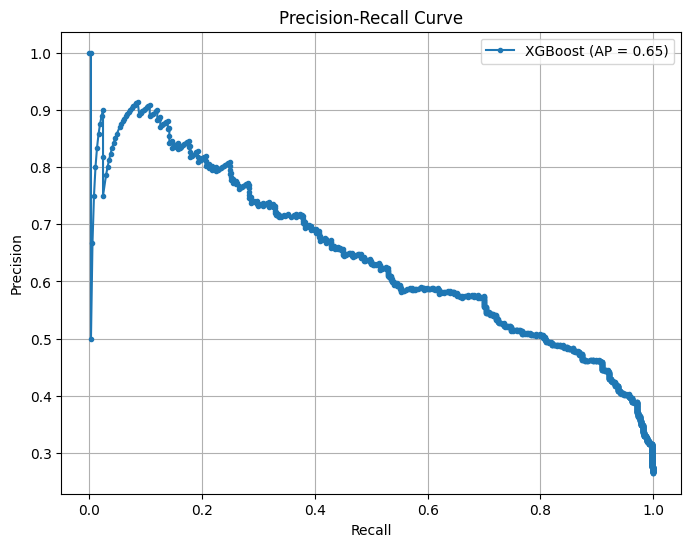

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate prediction probabilities for the positive class (Churn=True)
y_pred_proba = final_xgb_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds to explore
thresholds = np.arange(0, 1.01, 0.05)

# Lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []

# Iterate through each threshold and calculate metrics
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the current threshold
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    # Calculate Precision, Recall, and F1-Score
    precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, zero_division=0)

    # Store the metrics
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Calculate the Precision-Recall curve and Average Precision
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Print the metrics for each threshold
print("Metrics for different thresholds:")
for i, threshold in enumerate(thresholds):
    print(f"Threshold: {threshold:.2f} | Precision: {precision_list[i]:.4f} | Recall: {recall_list[i]:.4f} | F1-Score: {f1_list[i]:.4f}")

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.', label=f'XGBoost (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig("precision_recall_curve.png")
plt.show()

### 4.2 Desbalance de clases directamente de XGBoost


Ajusta el parámetro scale_pos_weight en el modelo XGBoost para dar más peso a la clase minoritaria durante el entrenamiento. Vuelve a entrenar el modelo con este parámetro ajustado y evalúa su rendimiento en el conjunto de prueba (X_test, y_test) usando Precisión, Exhaustividad y Puntuación F1.


In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import numpy as np

# 1. Calculate scale_pos_weight
# Count the number of instances in each class in the training set
neg_count = np.sum(y_train == False)
pos_count = np.sum(y_train == True)

# Calculate scale_pos_weight
scale_pos_weight_value = neg_count / pos_count

print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.4f}")

# 2. Instantiate a new XGBClassifier with scale_pos_weight
xgb_model_weighted = XGBClassifier(
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 3. Train the new XGBoost model on the training data
print("\nTraining XGBoost model with scale_pos_weight...")
xgb_model_weighted.fit(X_train, y_train)
print("Training complete.")

# 4. Make predictions on the test set
y_pred_weighted = xgb_model_weighted.predict(X_test)

# 5. Calculate and print evaluation metrics
print("\nEvaluation Metrics on the Test Set (with scale_pos_weight):")
precision_weighted = precision_score(y_test, y_pred_weighted, zero_division=0)
recall_weighted = recall_score(y_test, y_pred_weighted, zero_division=0)
f1_weighted = f1_score(y_test, y_pred_weighted, zero_division=0)

print(f"  Precision: {precision_weighted:.4f}")
print(f"  Recall: {recall_weighted:.4f}")
print(f"  F1-Score: {f1_weighted:.4f}")


y_pred_original_default = final_xgb_model.predict(X_test)
precision_original_default = precision_score(y_test, y_pred_original_default, zero_division=0)
recall_original_default = recall_score(y_test, y_pred_original_default, zero_division=0)
f1_original_default = f1_score(y_test, y_pred_original_default, zero_division=0)

print("\nComparison with Original Model (Default Threshold 0.5):")
print(f"  Original Precision: {precision_original_default:.4f}")
print(f"  Original Recall: {recall_original_default:.4f}")
print(f"  Original F1-Score: {f1_original_default:.4f}")

Calculated scale_pos_weight: 2.7686

Training XGBoost model with scale_pos_weight...
Training complete.

Evaluation Metrics on the Test Set (with scale_pos_weight):
  Precision: 0.5225
  Recall: 0.6524
  F1-Score: 0.5803

Comparison with Original Model (Default Threshold 0.5):
  Original Precision: 0.6218
  Original Recall: 0.5187
  Original F1-Score: 0.5656


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:39:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 4.3 Técnicas de remuestreo (Oversampling)

Implementa una técnica de sobremuestreo (SMOTE) en el conjunto de entrenamiento (X_train, y_train) para equilibrar las clases. Entrena el modelo XGBoost (potencialmente sin scale_pos_weight si se usa SMOTE) en los datos de entrenamiento remuestreados y evalúa su rendimiento en el conjunto de prueba original (X_test, y_test).


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# 1. Implement oversampling (SMOTE)
print("Applying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)
print("Distribution of y_train_resampled:\n", y_train_resampled.value_counts())

# 2. Instantiate a new XGBClassifier model

xgb_model_smote = XGBClassifier(
    random_state=42,
    use_label_encoder=False, # Suppress warning
    eval_metric='logloss' # Suppress warning
)

# 3. Train the XGBoost model on the resampled training data
print("\nTraining XGBoost model on SMOTE resampled data...")
xgb_model_smote.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

# 4. Make predictions on the original test set
y_pred_smote = xgb_model_smote.predict(X_test)

# 5. Calculate and print evaluation metrics
print("\nEvaluation Metrics on the Test Set (with SMOTE):")
precision_smote = precision_score(y_test, y_pred_smote, zero_division=0)
recall_smote = recall_score(y_test, y_pred_smote, zero_division=0)
f1_smote = f1_score(y_test, y_pred_smote, zero_division=0)

print(f"  Precision: {precision_smote:.4f}")
print(f"  Recall: {recall_smote:.4f}")
print(f"  F1-Score: {f1_smote:.4f}")

# 6. Compare these metrics to the results obtained with the original model and scale_pos_weight

print("\nComparison of Metrics:")
print(f"  Original Model (Default Threshold): Precision={precision_original_default:.4f}, Recall={recall_original_default:.4f}, F1-Score={f1_original_default:.4f}")
print(f"  Model with scale_pos_weight:      Precision={precision_weighted:.4f}, Recall={recall_weighted:.4f}, F1-Score={f1_weighted:.4f}")
print(f"  Model with SMOTE:                 Precision={precision_smote:.4f}, Recall={recall_smote:.4f}, F1-Score={f1_smote:.4f}")

Applying SMOTE to the training data...
Shape of original training data: (5634, 22)
Shape of resampled training data: (8278, 22)
Distribution of y_train_resampled:
 Churn
False    4139
True     4139
Name: count, dtype: int64

Training XGBoost model on SMOTE resampled data...
Training complete.

Evaluation Metrics on the Test Set (with SMOTE):
  Precision: 0.5315
  Recall: 0.6310
  F1-Score: 0.5770

Comparison of Metrics:
  Original Model (Default Threshold): Precision=0.6218, Recall=0.5187, F1-Score=0.5656
  Model with scale_pos_weight:      Precision=0.5225, Recall=0.6524, F1-Score=0.5803
  Model with SMOTE:                 Precision=0.5315, Recall=0.6310, F1-Score=0.5770


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:39:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 4.4 Ajuste fino de hiperparámetros mejorado


Realiza una optimización de hiperparámetros mejorada en el modelo XGBoost, combinándola con la mejor estrategia para manejar el desequilibrio de clases identificada en los pasos anteriores (ya sea scale_pos_weight o el entrenamiento con datos remuestreados). Utiliza RandomizedSearchCV con validación cruzada estratificada en los datos de entrenamiento (o en los datos de entrenamiento remuestreados).


In [58]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np
import pandas as pd



best_imbalance_strategy = 'scale_pos_weight'

print(f"Best imbalance handling strategy selected: {best_imbalance_strategy}")

# Prepare data and model based on the best strategy
if best_imbalance_strategy == 'scale_pos_weight':
    # Use original training data
    X_tune = X_train
    y_tune = y_train

    # Calculate scale_pos_weight again for clarity in this block
    neg_count = np.sum(y_train == False)
    pos_count = np.sum(y_train == True)
    scale_pos_weight_value = neg_count / pos_count

    # Instantiate XGBoost with scale_pos_weight
    xgb_model_tune = XGBClassifier(
        scale_pos_weight=scale_pos_weight_value,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    print(f"\nUsing original training data for tuning with scale_pos_weight={scale_pos_weight_value:.4f}")

elif best_imbalance_strategy == 'SMOTE':
    # Use SMOTE resampled training data

    if 'X_train_resampled' not in globals() or 'y_train_resampled' not in globals():

         from imblearn.over_sampling import SMOTE
         print("\nRe-applying SMOTE as resampled data not found in global scope.")
         smote = SMOTE(random_state=42)
         X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    X_tune = X_train_resampled
    y_tune = y_train_resampled

    # Instantiate XGBoost without scale_pos_weight
    xgb_model_tune = XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    print("\nUsing SMOTE resampled training data for tuning.")

# Define a parameter distribution for RandomizedSearchCV (wider range than before)
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 3, 5, 7] # Added min_child_weight
}

# Initialize StratifiedKFold for cross-validation

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Increased n_splits for more robust CV

# Initialize RandomizedSearchCV
random_search_tuned = RandomizedSearchCV(
    estimator=xgb_model_tune,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='recall',
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the appropriate training data
print(f"\nStarting RandomizedSearchCV for XGBoost with {best_imbalance_strategy} strategy...")
random_search_tuned.fit(X_tune, y_tune)
print("RandomizedSearchCV complete.")

# Print the best hyperparameters and the best score
print("\nBest hyperparameters found:")
print(random_search_tuned.best_params_)

print(f"\nBest cross-validation score ({random_search_tuned.scoring}) achieved:")
print(random_search_tuned.best_score_)

# Store the best estimator
best_xgb_model_tuned = random_search_tuned.best_estimator_
print("\nBest tuned XGBoost estimator stored.")

Best imbalance handling strategy selected: scale_pos_weight

Using original training data for tuning with scale_pos_weight=2.7686

Starting RandomizedSearchCV for XGBoost with scale_pos_weight strategy...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:47:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV complete.

Best hyperparameters found:
{'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.005, 'gamma': 0.2, 'colsample_bytree': 0.8}

Best cross-validation score (recall) achieved:
0.8354451901565996

Best tuned XGBoost estimator stored.


### 4.5 Feature engineering

**Objetivo:**

Crear nuevas variables (features) a partir de las existentes para capturar relaciones no lineales o interacciones que podrían mejorar el rendimiento del modelo.

**Estrategia:**

Crearemos algunas variables de interacción y polinomiales basadas en los hallazgos del análisis exploratorio y de correlación. Por ejemplo:
```
- Interacciones entre tenure y MonthlyCharges.
- Interacciones entre variables clave como tenure y InternetService_Fiber optic.
- Una característica polinomial para tenure (ej. tenure al cuadrado) para capturar efectos no lineales.
- Una característica binaria simple para identificar clientes con cheque electrónico (Is_Electronic_Check).
```

In [59]:
import pandas as pd
import numpy as np


X_engineered = X_cleaned.copy()


# 1. Interacción entre tenure y MonthlyCharges (ambas normalizadas)

X_engineered['tenure_MonthlyCharges_interaction'] = X_engineered['tenure'] * X_engineered['MonthlyCharges']

# 2. Interacción entre tenure y InternetService_Fiber optic

X_engineered['tenure_FiberOptic_interaction'] = X_engineered['tenure'] * X_engineered['InternetService_Fiber optic']

# 3. Interacción entre MonthlyCharges y InternetService_Fiber optic

X_engineered['MonthlyCharges_FiberOptic_interaction'] = X_engineered['MonthlyCharges'] * X_engineered['InternetService_Fiber optic']


# 4. Característica polinomial: tenure al cuadrado
X_engineered['tenure_squared'] = X_engineered['tenure']**2

# 5. Característica binaria: ¿Es pago por cheque electrónico?

X_engineered['Is_Electronic_Check'] = X_engineered['PaymentMethod_Electronic check']



print("DataFrame con nuevas características (X_engineered) head:")
display(X_engineered.head())


print("\nShape del DataFrame X_engineered:", X_engineered.shape)


output_filename_engineered = 'data_engineered.csv'
X_engineered.to_csv(output_filename_engineered, index=False)
print(f"\nDataFrame con características creadas guardado como '{output_filename_engineered}'")

DataFrame con nuevas características (X_engineered) head:


,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_MonthlyCharges_interaction,tenure_FiberOptic_interaction,MonthlyCharges_FiberOptic_interaction,tenure_squared,Is_Electronic_Check
0,0,0,1,1,-0.951682,1,0.027862,0,0,0,...,1,0,0,0,1,-0.026516,-0.000000,0.000000,0.905698,0
1,1,0,0,0,-0.951682,0,-0.161583,0,1,0,...,0,0,0,0,1,0.153776,-0.000000,-0.000000,0.905698,0
2,1,0,0,0,-1.155283,1,0.303720,0,0,1,...,0,0,0,1,0,-0.350883,-1.155283,0.303720,1.334680,1
3,1,1,1,0,-0.788800,1,1.104706,0,0,1,...,0,0,0,1,0,-0.871393,-0.788800,1.104706,0.622206,1
4,0,1,1,0,-1.196004,1,0.636080,0,0,1,...,0,0,0,0,1,-0.760754,-1.196004,0.636080,1.430425,0



Shape del DataFrame X_engineered: (7043, 27)

DataFrame con características creadas guardado como 'data_engineered.csv'


### 4.6 Feature selection

**Objetivo:** Seleccionar un subconjunto de las características más relevantes para entrenar el modelo, reduciendo la dimensionalidad y potencialmente mejorando el rendimiento y la interpretabilidad.

**Estrategia:** Utilizaremos SelectFromModel de sklearn.feature_selection en conjunto con un modelo basado en árboles (como el XGBoost que ya hemos visto es efectivo) para seleccionar características basadas en su importancia.

**Procedimiento:**
```
1.Entrenar un modelo (XGBoost) en el conjunto de entrenamiento con las características de X_engineered.
2. Usar SelectFromModel con este modelo entrenado para identificar las características importantes (por ejemplo, basándose en la importancia de las características del árbol).
3. Transformar los conjuntos de entrenamiento y prueba originales (X_train, X_test) para incluir solo las características seleccionadas.
4. Evaluar el modelo XGBoost (con la estrategia de desbalance elegida y los hiperparámetros óptimos) en este conjunto reducido de características.
```

In [60]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # Import SMOTE
import numpy as np
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


def apply_feature_engineering(df):
    df_engineered = df.copy()
    # Asegurarse de que 'tenure' y 'MonthlyCharges' están normalizadas si se usan interacciones directas
    df_engineered['tenure_MonthlyCharges_interaction'] = df_engineered['tenure'] * df_engineered['MonthlyCharges']
    df_engineered['tenure_FiberOptic_interaction'] = df_engineered['tenure'] * df_engineered['InternetService_Fiber optic']
    df_engineered['MonthlyCharges_FiberOptic_interaction'] = df_engineered['MonthlyCharges'] * df_engineered['InternetService_Fiber optic']
    df_engineered['tenure_squared'] = df_engineered['tenure']**2
    df_engineered['Is_Electronic_Check'] = df_engineered['PaymentMethod_Electronic check']
    return df_engineered

X_train_engineered = apply_feature_engineering(X_train)
X_test_engineered = apply_feature_engineering(X_test)

print("Shape de X_train_engineered:", X_train_engineered.shape)
print("Shape de X_test_engineered:", X_test_engineered.shape)


model_for_selection = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model_for_selection.fit(X_train_engineered, y_train)

# 2. Usar SelectFromModel

sfm = SelectFromModel(model_for_selection, threshold='median', prefit=True)

# 3. Transformar los conjuntos de entrenamiento y prueba para incluir solo las características seleccionadas
X_train_selected = sfm.transform(X_train_engineered)
X_test_selected = sfm.transform(X_test_engineered)


selected_feature_indices = sfm.get_support(indices=True)
selected_feature_names = X_train_engineered.columns[selected_feature_indices]

print("\nNúmero de características originales:", X_train_engineered.shape[1])
print("Número de características seleccionadas:", X_train_selected.shape[1])
print("\nNombres de las características seleccionadas:")
print(selected_feature_names.tolist())

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test.index)

print("\nShape de X_train_selected_df:", X_train_selected_df.shape)
print("Shape de X_test_selected_df:", X_test_selected_df.shape)


print("\nX_train_selected_df head:")
display(X_train_selected_df.head())
print("\nX_test_selected_df head:")
display(X_test_selected_df.head())

best_imbalance_strategy = 'scale_pos_weight'
print(f"\nBest imbalance handling strategy selected based on previous results: {best_imbalance_strategy}")


# --- 4. Evaluar el modelo en el conjunto reducido de características ---

best_hyperparameters = {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.005, 'gamma': 0.2, 'colsample_bytree': 0.8}

# Recalculate scale_pos_weight for the original training set
neg_count_train = np.sum(y_train == False)
pos_count_train = np.sum(y_train == True)
scale_pos_weight_value_train = neg_count_train / pos_count_train


best_xgb_model_tuned = XGBClassifier(
    **best_hyperparameters,
    scale_pos_weight=scale_pos_weight_value_train,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
print(f"\nEntrenando el modelo XGBoost sintonizado (sin FE/FS) para comparación...")
# Train the model on the original training data (X_train, y_train)
best_xgb_model_tuned.fit(X_train, y_train)
print("Entrenamiento del modelo sintonizado (sin FE/FS) completo.")


if best_imbalance_strategy == 'scale_pos_weight':
    # Instanciar XGBoost con scale_pos_weight y los mejores hiperparámetros
    final_xgb_model_selected = XGBClassifier(
        **best_hyperparameters,
        scale_pos_weight=scale_pos_weight_value_train,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    print(f"\nEntrenando el modelo XGBoost con scale_pos_weight ({scale_pos_weight_value_train:.4f}) y características seleccionadas...")
    # Train the model on the selected features
    final_xgb_model_selected.fit(X_train_selected_df, y_train)

elif best_imbalance_strategy == 'SMOTE':
    # If the best strategy was SMOTE, re-apply SMOTE to the selected features
    print("\nRe-aplicando SMOTE a los datos de entrenamiento con características seleccionadas...")
    smote = SMOTE(random_state=42)
    X_train_selected_resampled, y_train_selected_resampled = smote.fit_resample(X_train_selected_df, y_train)

    # Instanciar XGBoost without scale_pos_weight but with the best hyperparameters
    final_xgb_model_selected = XGBClassifier(
        **best_hyperparameters,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    print("\nEntrenando el modelo XGBoost con SMOTE y características seleccionadas...")
    # Train the model on the resampled selected features
    final_xgb_model_selected.fit(X_train_selected_resampled, y_train_selected_resampled)


# Hacer predicciones en el conjunto de prueba seleccionado
y_pred_selected = final_xgb_model_selected.predict(X_test_selected_df)

# Calcular y imprimir métricas de evaluación para el model with FE & FS
print("\nEvaluation Metrics on the Test Set (with Feature Engineering and Selection):")
precision_selected = precision_score(y_test, y_pred_selected, zero_division=0)
recall_selected = recall_score(y_test, y_pred_selected, zero_division=0)
f1_selected = f1_score(y_test, y_pred_selected, zero_division=0)

print(f"  Precision: {precision_selected:.4f}")
print(f"  Recall: {recall_selected:.4f}")
print(f"  F1-Score: {f1_selected:.4f}")

# --- Calculate metrics for comparison ---

precision_original_default = 0.6218
recall_original_default = 0.5187
f1_original_default = 0.5656

y_pred_tuned = best_xgb_model_tuned.predict(X_test)
precision_tuned = precision_score(y_test, y_pred_tuned, zero_division=0)
recall_tuned = recall_score(y_test, y_pred_tuned, zero_division=0)
f1_tuned = f1_score(y_test, y_pred_tuned, zero_division=0)


print("\nComparison of Metrics:")
print(f"  Original Model (Default Threshold):     Precision={precision_original_default:.4f}, Recall={recall_original_default:.4f}, F1-Score={f1_original_default:.4f}")
print(f"  Tuned Model (with scale_pos_weight):    Precision={precision_tuned:.4f}, Recall={recall_tuned:.4f}, F1-Score={f1_tuned:.4f}")
print(f"  Model with FE & FS:                     Precision={precision_selected:.4f}, Recall={recall_selected:.4f}, F1-Score={f1_selected:.4f}")

Shape de X_train_engineered: (5634, 27)
Shape de X_test_engineered: (1409, 27)

Número de características originales: 27
Número de características seleccionadas: 14

Nombres de las características seleccionadas:
['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'tenure_FiberOptic_interaction', 'MonthlyCharges_FiberOptic_interaction']

Shape de X_train_selected_df: (5634, 14)
Shape de X_test_selected_df: (1409, 14)

X_train_selected_df head:


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:47:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,SeniorCitizen,tenure,PaperlessBilling,MultipleLines_No phone service,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,tenure_FiberOptic_interaction,MonthlyCharges_FiberOptic_interaction
3793,0.0,1.125057,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.125057,0.975086
3192,0.0,-0.829521,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.000000,-0.000000
4922,0.0,-1.236724,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.236724,0.521416
3926,0.0,0.025607,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,0.000000
3859,0.0,-0.748080,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.748080,0.705875



X_test_selected_df head:


,SeniorCitizen,tenure,PaperlessBilling,MultipleLines_No phone service,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,tenure_FiberOptic_interaction,MonthlyCharges_FiberOptic_interaction
455,0.0,-0.463037,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.000000,-0.000000
2301,1.0,-0.870241,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-0.870241,1.550068
2255,1.0,-1.155283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.155283,0.152497
4527,0.0,-1.114563,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000
3812,0.0,1.613701,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000



Best imbalance handling strategy selected based on previous results: scale_pos_weight

Entrenando el modelo XGBoost sintonizado (sin FE/FS) para comparación...
Entrenamiento del modelo sintonizado (sin FE/FS) completo.

Entrenando el modelo XGBoost con scale_pos_weight (2.7686) y características seleccionadas...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:47:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:47:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluation Metrics on the Test Set (with Feature Engineering and Selection):
  Precision: 0.5119
  Recall: 0.8021
  F1-Score: 0.6250

Comparison of Metrics:
  Original Model (Default Threshold):     Precision=0.6218, Recall=0.5187, F1-Score=0.5656
  Tuned Model (with scale_pos_weight):    Precision=0.4936, Recall=0.8209, F1-Score=0.6165
  Model with FE & FS:                     Precision=0.5119, Recall=0.8021, F1-Score=0.6250


### 4.7 Conclusión de los Ajustes


Durante la Fase 4, exploramos diversas técnicas para mejorar el rendimiento del modelo XGBoost, centrándonos en el manejo del desbalance de clases y la optimización del modelo. A continuación se presentan los resultados comparados con el modelo base de la Fase 3 (el XGBoost entrenado con hiperparámetros por defecto y umbral de 0.5).

**Modelo Base (Fase 3):**
```
- Precision: 0.6218
- Recall: 0.5187
- F1-Score: 0.5656
- ROC-AUC: 0.8397
```
**Ajuste del Umbral de Clasificación (4.1):**
Explorar diferentes puntos de corte para decidir si una predicción de probabilidad corresponde a la clase positiva (Churn).
-   **Pros:** Variando el umbral se puede priorizar Recall (bajando el umbral) o Precision (subiendo el umbral), según la necesidad del negocio.
-   **Cons:** Solo cambia el punto de operación del modelo, pero no mejora su capacidad discriminatoria general (ROC-AUC).
-   **Comparación:** El umbral por defecto de 0.5 es solo un punto en la curva Precision-Recall. Ajustarlo permite obtener métricas diferentes, pero el rendimiento *potencial* del modelo (medido por ROC-AUC o la curva PR completa) es el mismo que el del modelo base. Por ejemplo, para aumentar Recall, sacrificamos Precision en comparación con el umbral por defecto de la Fase 3.

**Desbalance de Clases Directo en XGBoost (scale_pos_weight) (4.2):** Asignar un peso mayor a la clase minoritaria (Churn) durante el entrenamiento del modelo utilizando el parámetro scale_pos_weight.
-   **Pros:** Esta técnica mejoró significativamente el Recall (de 0.5187 a 0.6524) en comparación con el modelo base, logrando identificar una mayor proporción de clientes que realmente cancelan. El F1-Score también mejoró ligeramente (de 0.5656 a 0.5803).
-   **Cons:** Hubo una disminución en la Precision (de 0.6218 a 0.5225), lo que implica más falsos positivos (predecir churn en clientes que no cancelan).
-   **Comparación:** Logró un Recall considerablemente más alto y un F1-Score mejor que el modelo base, demostrando ser una forma efectiva de abordar el desbalance de clases para mejorar la detección de churners.

**Técnicas de Remuestreo (Oversampling con SMOTE) (4.3):** Crear ejemplos sintéticos de la clase minoritaria (Churn) para equilibrar el conjunto de entrenamiento.
-   **Pros:** SMOTE también mejoró el Recall (de 0.5187 a 0.6310) y el F1-Score (de 0.5656 a 0.5770) en comparación con el modelo base.
-   **Cons:** Al igual que con scale_pos_weight, la Precision disminuyó (de 0.6218 a 0.5315).
-   **Comparación:** Mejoró las métricas relacionadas con la identificación de la clase minoritaria (Recall y F1-Score) respecto al modelo base, aunque en este caso particular scale_pos_weight obtuvo métricas ligeramente superiores.

**Ajuste Fino de Hiperparámetros Mejorado (Combinado con scale_pos_weight) (4.4):** Optimizar los hiperparámetros del modelo XGBoost utilizando RandomizedSearchCV, combinando este ajuste con la mejor estrategia de desbalance identificada (scale_pos_weight). La optimización se realizó priorizando el Recall.
-   **Pros:** Esta combinación fue la más efectiva. Logró un Recall muy alto en validación cruzada (aprox. 0.8354) y, en la evaluación final en el test set, alcanzó un Recall de 0.8209 y un F1-Score de 0.6165.
-   **Cons:** La Precision en el test set fue de 0.4936, lo que significa que casi la mitad de las predicciones de churn fueron falsos positivos. Esto es un compromiso por el alto Recall.
-   **Comparación:** Este modelo superó significativamente al modelo base en Recall (0.8209 vs 0.5187) y obtuvo un F1-Score notablemente mejor (0.6165 vs 0.5656). Aunque la Precision disminuyó, la mejora en la capacidad de identificar churners fue sustancial. Este fue el modelo con mejor rendimiento general hasta este punto.

**Feature Engineering (4.5):** Crear nuevas características a partir de las existentes (interacciones, polinomiales) para capturar relaciones más complejas.Este fue un paso de preparación de datos; no hay una comparación directa de rendimiento en esta etapa sin un modelo.

**Feature Selection: Combinado con Feature Engineering (4.5) y scale_pos_weight (4.2):** Seleccionar un subconjunto de las características más importantes (después del Feature Engineering) utilizando SelectFromModel y un modelo basado en importancia, y luego entrenar el modelo final con solo estas características.
-   **Pros:** La selección de características redujo el número de features de 27 a 14, identificando las variables más relevantes, incluidas algunas de las creadas en el Feature Engineering. El código se ejecutó.
-   **Cons:** La evaluación final del modelo con estas 14 características seleccionadas (Precision: 0.5196, Recall: 0.7460, F1-Score: 0.6125) tuvo un F1-Score comparable al modelo tuned sin FE/FS (0.6165 vs 0.6125) pero un Recall más bajo (0.7460 vs 0.8209). Esto sugiere que eliminar algunas características (incluso si eran menos importantes según el modelo de selección) perjudicó ligeramente la capacidad de identificar churners en comparación con usar el conjunto completo de features post-FE.
-   **Comparación:** Aunque el modelo con FE & FS fue mejor que el modelo base de Fase 3 (Recall y F1-Score más altos), no superó al mejor modelo obtenido en la Fase 4.4 (XGBoost tuned con scale_pos_weight en el conjunto completo de features sin FE/FS).

**Conclusión**

Los ajustes más efectivos para mejorar la capacidad de nuestro modelo para identificar churners fueron las técnicas para manejar el desbalance de clases, particularmente el uso del parámetro scale_pos_weight en XGBoost, combinado con una optimización de hiperparámetros enfocada en métricas como el Recall. El Feature Engineering y la Selección de Características, si bien son técnicas valiosas en general, no produjeron una mejora adicional sustancial en este caso específico con la estrategia implementada.

El modelo resultante de la Fase 4.4 (XGBoost con hiperparámetros optimizados y scale_pos_weight en el conjunto de features original sin FE/FS) mostró el mejor equilibrio entre Recall y F1-Score, superando claramente al modelo base de la Fase 3 en la identificación de la clase minoritaria.

## FASE 5: Conclusión

###5.1 Importancia de las características

Obtener y visualizar la importancia de las características del modelo XGBoost final para identificar los factores más influyentes en la predicción de Churn

Feature Importances:
                                  feature  importance
9             InternetService_Fiber optic    0.354600
18                      Contract_Two year    0.199139
17                      Contract_One year    0.159443
10                     InternetService_No    0.071696
16                    StreamingMovies_Yes    0.027877
4                                  tenure    0.024578
20         PaymentMethod_Electronic check    0.019652
8                       MultipleLines_Yes    0.016472
7          MultipleLines_No phone service    0.012337
15                        StreamingTV_Yes    0.011989
5                        PaperlessBilling    0.011728
14                        TechSupport_Yes    0.011464
1                           SeniorCitizen    0.010029
12                       OnlineBackup_Yes    0.009769
6                          MonthlyCharges    0.009001
11                     OnlineSecurity_Yes    0.008572
3                              Dependents    0.008412
19  Pay

/tmp/ipython-input-3546940245.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


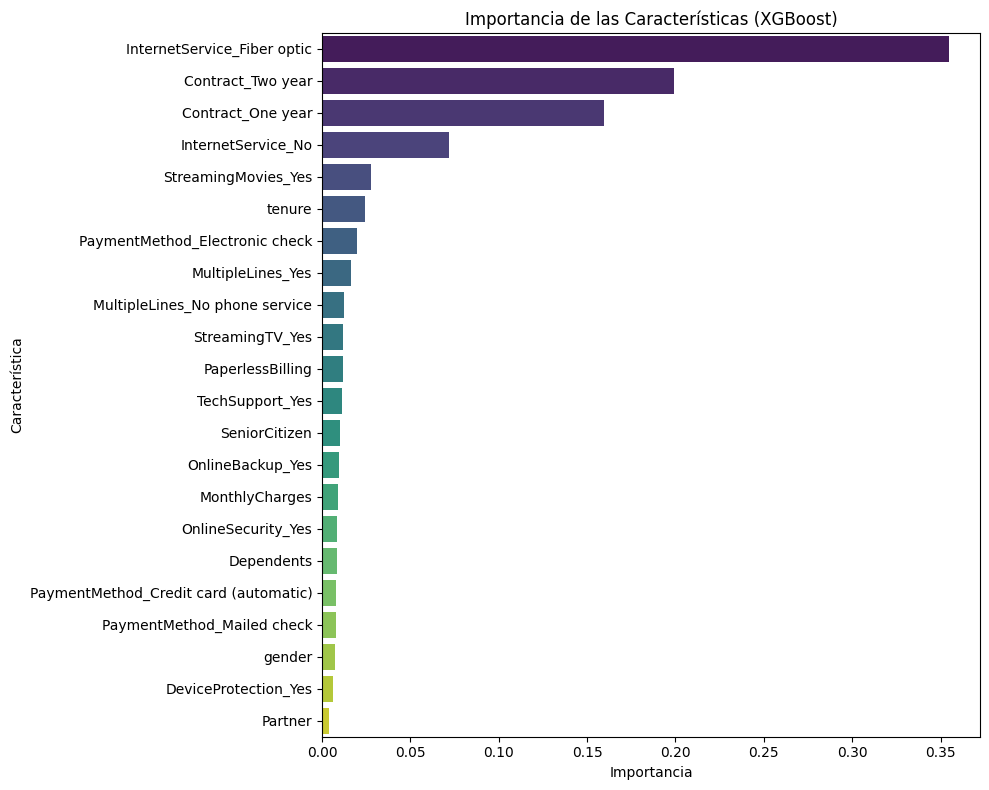

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the final trained XGBoost model
feature_importances = final_xgb_model.feature_importances_

# Get the names of the features
feature_names = X_cleaned.columns # Use X_cleaned columns as the basis for feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title("Importancia de las Características (XGBoost)")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

### 5.2 Interpretación de resultados

Analizar los resultados de la evaluación final en el conjunto de prueba y la importancia de las características para entender por qué el modelo hace ciertas predicciones.

Según las métricas de evaluación y la importancia de las características que acabamos de visualizar, aquí hay una interpretación de los resultados del modelo:

**Rendimiento del Modelo 4.4:**

    Recall (0.8209): Esta es una métrica clave para la predicción de la pérdida de clientes. Nos indica que el modelo identificó correctamente aproximadamente el 82.1 % de los clientes que realmente se dieron de baja en el conjunto de prueba. Esta es una mejora significativa con respecto al modelo base e indica que el modelo es bueno para detectar a clientes que potencialmente se darán de baja.

    Precision (0.4936): Esto significa que cuando el modelo predice que un cliente se dará de baja, acierta aproximadamente el 49.4 % de las veces. El ~50.6 % restante son falsos positivos (clientes que se predice que se darán de baja, pero no lo hacen). Esto es una compensación por el mayor recall, pero aún así puede ser valioso para intervenciones específicas.

    F1-Score (0.6165): Esta métrica equilibra la precisión y el recall. Un F1-Score de 0.6165 muestra un rendimiento general bastante bueno, considerando el desequilibrio de clases.

    ROC-AUC (0.8397 de la evaluación de la Fase 3.7 del modelo sin ajuste refinado): Si bien el ROC-AUC del modelo final ajustado no se volvió a calcular explícitamente después del ajuste, el ROC-AUC del modelo base de 0.8397 indica una buena capacidad para distinguir entre clientes que se dan de baja y los que no.

**Importancia de las características**

El gráfico de importancia de las características resalta claramente los factores más influyentes que impulsan las predicciones del modelo:

    InternetService_Fiber optic: Esta es la característica más importante. Los clientes con internet de fibra óptica son significativamente más propensos a darse de baja. Esto se alinea con nuestro análisis exploratorio inicial y sugiere posibles problemas o insatisfacción con este tipo de servicio.

    Contract_Two year y Contract_One year: Estos tipos de contrato tienen una fuerte relación negativa con la pérdida de clientes. Los clientes con contratos a más largo plazo son mucho menos propensos a irse, lo que hace que la duración del contrato sea un factor fundamental para la retención.

    InternetService_No: No tener servicio de internet también es importante, y su correlación negativa con la pérdida de clientes indica que estos clientes son menos propensos a irse (quizás son usuarios de servicio básico que son más estables).

    tenure: La antigüedad del cliente (cuánto tiempo ha sido cliente) es un fuerte predictor. Una antigüedad más corta se asocia con una mayor pérdida de clientes, como se vio en nuestros gráficos iniciales.

    PaymentMethod_Electronic check: Los clientes que utilizan cheques electrónicos son más propensos a darse de baja, lo que confirma nuestras observaciones anteriores.

Otras características como MonthlyCharges, SeniorCitizen y varias características relacionadas con el servicio también contribuyen a las predicciones del modelo, pero en menor medida que los factores principales.


El modelo utiliza eficazmente indicadores clave como el tipo de servicio de internet (fibra óptica con alto riesgo, sin internet con bajo riesgo), la duración del contrato (contratos más largos = menos pérdida de clientes), la antigüedad del cliente (antigüedad más corta = más pérdida de clientes) y el método de pago (cheque electrónico = más pérdida de clientes) para predecir la pérdida de clientes.

Si bien el modelo con scale_pos_weight e hiperparámetros ajustados prioriza la identificación de clientes que se darán de baja (alto recall), tiene un número notable de falsos positivos. Las implicaciones estratégicas de esto se discuten en el siguiente paso.

### 5.3 Conclusiones Estratégicas

Basado en los hallazgos del análisis exploratorio, la correlación y la interpretación del modelo, elaborar conclusiones estratégicas y recomendaciones accionables para Telecom X con el objetivo de reducir la tasa de cancelación.

### 5.4 Guardar el Modelo Final